# Introdução

####Este projeto tem como objetivo aplicar técnicas de análise de dados utilizando Python para investigar o desempenho dos participantes na prova de Ciências da Natureza do Enem 2023. A partir dos microdados disponibilizados pelo INEP, foram realizadas etapas de limpeza, tratamento e análise exploratória, com o apoio de visualizações gráficas para facilitar a interpretação das informações.

####Formulei perguntas que considerei pertinentes com base nos dados disponíveis e busquei respondê-las por meio da criação de gráficos, com o intuito de identificar padrões, comparações e possíveis relações entre fatores socioeconômicos e o desempenho dos alunos.

# Importação e preparação inicial

####Dados utilizados:

Fonte: INEP

Link: Microdados Enem 2023

Arquivo principal: microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv

Dicionário de variáveis: microdados_enem_2023/DICIONÁRIO/Dicionário_Microdados_Enem_2023.xlsx

Cada linha do conjunto de dados representa um participante do Enem 2023,
contendo informações como dados sociodemográficos, tipo de escola, localização e notas obtidas em cada prova.

##Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import seaborn as sns

##Leitura dos Dados e Dicionário

In [2]:
drive.mount('/content/drive', force_remount=True)
csv_path = '/content/drive/MyDrive/Ciência de Dados/microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv'

# Leitura do arquivo
df = pd.read_csv(csv_path, encoding='ISO-8859-1', sep=';')

# Dicionário com as informações

dicionario = {
    "TP_FAIXA_ETARIA": {
        1: "Menor de 17 anos",
        2: "17 anos",
        3: "18 anos",
        4: "19 anos",
        5: "20 anos",
        6: "21 anos",
        7: "22 anos",
        8: "23 anos",
        9: "24 anos",
        10: "25 anos",
        11: "Entre 26 e 30 anos",
        12: "Entre 31 e 35 anos",
        13: "Entre 36 e 40 anos",
        14: "Entre 41 e 45 anos",
        15: "Entre 46 e 50 anos",
        16: "Entre 51 e 55 anos",
        17: "Entre 56 e 60 anos",
        18: "Entre 61 e 65 anos",
        19: "Entre 66 e 70 anos",
        20: "Maior de 70 anos"
    },
    "TP_SEXO": {
        'M': "Masculino",
        'F': "Feminino"
    },
    "TP_ESTADO_CIVIL": {
        0: "Não informado",
        1: "Solteiro(a)",
        2: "Casado(a)/Mora com companheiro(a)",
        3: "Divorciado(a)/Desquitado(a)/Separado(a)",
        4: "Viúvo(a)"
    },
    "TP_COR_RACA": {
        0: "Não declarado",
        1: "Branca",
        2: "Preta",
        3: "Parda",
        4: "Amarela",
        5: "Indígena",
        6: "Não dispõe da informação"
    },
    "TP_NACIONALIDADE": {
        0: "Não informado",
        1: "Brasileiro(a)",
        2: "Brasileiro(a) Naturalizado(a)",
        3: "Estrangeiro(a)",
        4: "Brasileiro(a) Nato(a), nascido(a) no exterior"
    },
    "TP_ST_CONCLUSAO": {
        1: "Já concluí o Ensino Médio",
        2: "Estou cursando e concluirei o Ensino Médio em 2023",
        3: "Estou cursando e concluirei o Ensino Médio após 2023",
        4: "Não concluí e não estou cursando o Ensino Médio"
    },
    "TP_ANO_CONCLUIU": {
        0: "Não informado",
        1: "2022",
        2: "2021",
        3: "2020",
        4: "2019",
        5: "2018",
        6: "2017",
        7: "2016",
        8: "2015",
        9: "2014",
        10: "2013",
        11: "2012",
        12: "2011",
        13: "2010",
        14: "2009",
        15: "2008",
        16: "2007",
        17: "Antes de 2007"
    },
    "TP_ESCOLA": {
        1: "Não Respondeu",
        2: "Pública",
        3: "Privada"
    },
    "TP_ENSINO": {
        1: "Ensino Regular",
        2: "Educação Especial - Modalidade Substitutiva"
    },
    "IN_TREINEIRO": {
        1: "Sim",
        0: "Não"
    },
    "TP_DEPENDENCIA_ADM_ESC": {
        1: "Federal",
        2: "Estadual",
        3: "Municipal",
        4: "Privada"

    },
    "TP_LOCALIZACAO_ESC": {
        1: "Urbana",
        2: "Rural"
    },
    "TP_SIT_FUNC_ESC": {
        1: "Em atividade",
        2: "Paralisada",
        3: "Extinta",
        4: "Escola extinta em anos anteriores."

    },
    "TP_PRESENCA_CN": {
        0: "Faltou à prova",
        1: "Presente na prova",
        2: "Eliminado na prova"
    },
    "CO_PROVA_CN": {
        1221: "Azul",
        1222: "Amarela",
        1223: "Rosa",
        1224: "Cinza",
        1225: "Rosa - Ampliada",
        1226: "Rosa - Superampliada",
        1227: "Laranja - Braile",
        1228: "Laranja - Adaptada Ledor",
        1229: "Verde - Videoprova - Libras",
        1301: "Azul (Reaplicação)",
        1302: "Amarela (Reaplicação)",
        1303: "Cinza (Reaplicação)",
        1304: "Rosa (Reaplicação)"
    },
    "Q006": {
        'A': "Nenhuma Renda",
        'B': "Até R$ 1.320,00",
        'C': "De R$ 1.320,01 até R$ 1.980,00.",
        'D': "De R$ 1.980,01 até R$ 2.640,00.",
        'E': "De R$ 2.640,01 até R$ 3.300,00.",
        'F': "De R$ 3.300,01 até R$ 3.960,00.",
        'G': "De R$ 3.960,01 até R$ 5.280,00.",
        'H': "De R$ 5.280,01 até R$ 6.600,00.",
        'I': "De R$ 6.600,01 até R$ 7.920,00.",
        'J': "De R$ 7.920,01 até R$ 9240,00.",
        'K': "De R$ 9.240,01 até R$ 10.560,00.",
        'L': "De R$ 10.560,01 até R$ 11.880,00.",
        'M': "De R$ 11.880,01 até R$ 13.200,00.",
        'N': "De R$ 13.200,01 até R$ 15.840,00.",
        'O': "De R$ 15.840,01 até R$19.800,00.",
        'P': "De R$ 19.800,01 até R$ 26.400,00.",
        'Q': "Acima de R$ 26.400,00."
    },
    "Q001": {
        'A': "Nunca estudou.",
        'B': "4ª/5º ano EF incompleto.",
        'C': "4ª/5º ano completo, 8ª/9º ano EF incompleto.",
        'D': "8ª/9º ano EF, Ensino Médio incompleto.",
        'E': "Ensino Médio completo, Faculdade incompleta.",
        'F': "Faculdade completa, Pós-graduação incompleta.",
        'G': "Pós-graduação completa.",
        'H': "Não sei."
    },
    "Q002": {
        'A': "Nunca estudou.",
        'B': "4ª/5º ano EF incompleto.",
        'C': "4ª/5º ano completo, 8ª/9º ano EF incompleto.",
        'D': "8ª/9º ano EF, Ensino Médio incompleto.",
        'E': "Ensino Médio completo, Faculdade incompleta.",
        'F': "Faculdade completa, Pós-graduação incompleta.",
        'G': "Pós-graduação completa.",
        'H': "Não sei."
    },
    "Q025": {
        'A': "Não",
        'B': "Sim"
    }
}

# Iterando sobre as chaves do dicionário e substituindo os valores no DataFrame
for coluna, mapeamento in dicionario.items():
    df[coluna] = df[coluna].replace(mapeamento)

Mounted at /content/drive


#Limpeza e Tratamento dos Dados

In [3]:
df_limpo = df.copy()
colunas_removidas = ['TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
                     'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
                     'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                     'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
                     'TP_LINGUA',
                     'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                     'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']
df_limpo = df_limpo.drop(columns=colunas_removidas)
print(f"Colunas restantes: {df_limpo.columns}")

# Informações básicas - Cópia limpa
print(f'Registros: {len(df_limpo)}\nVariáveis: {len(df_limpo.columns)}')

print(df_limpo.head())

# Verifica as primeiras 5 linhas
df_limpo.head()

# Verifica as informações do DataFrame, como tipos de dados e valores ausentes
df_limpo.info()

# Obtém estatísticas descritivas dos dados numéricos
df_limpo.describe()
print(df_limpo['TP_PRESENCA_CN'])

print(len(df_limpo))
df_limpo = df_limpo[df_limpo['TP_PRESENCA_CN'] == "Presente na prova"]

print(df_limpo['TP_PRESENCA_CN'].value_counts())  # Para conferir os valores restantes
print(f'Registros após filtro: {len(df_limpo)}')  # Para ver quantos registros sobraram
print(df_limpo.head())

# Valores nulos
nulos = df_limpo.isnull().sum()
print(nulos[nulos > 0])  # Mostra apenas as colunas com valores ausentes

valores_nulos = df_limpo.isna().sum()
print(valores_nulos)

codificadas = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC']
quantitativas = ['CO_MUNICIPIO_ESC', 'CO_UF_ESC']
qualitativas = ['NO_MUNICIPIO_ESC', 'SG_UF_ESC']

for colunas in codificadas:
  print(colunas)
  # Verificando se o 0 já não é um código existente
  print(f"Existem {(df_limpo[colunas] == 0).sum()} ZEROS na coluna.")

  # substituindo campos nulos de TP_ENSINO por 0, que significa "Não informado"
  df_limpo[colunas] = df_limpo[colunas].fillna(0)
  print(f"Quantidade de ZEROS na coluna {(df_limpo[colunas] == 0).sum()}.")
  print(f"Quantidade de campos NULOS na coluna {df_limpo[colunas].isnull().sum()}.")

  # adicionando o código 0 do TP_ENSINO no dicionário
  dicionario.setdefault(colunas, {})[0] = "Não informado"

  # print(dicionario)

for colunas in quantitativas:
  print(colunas)
   # Verificando se o 0 já não é um código existente
  print(f"Existem {(df_limpo[colunas] == 0).sum()} ZEROS na coluna.")

  # substituindo campos nulos de TP_ENSINO por 0, que significa "Não informado"
  df_limpo[colunas] = df_limpo[colunas].fillna(0)
  print(f"Quantidade de ZEROS na coluna {(df_limpo[colunas] == 0).sum()}.")
  print(f"Quantidade de campos NULOS na coluna {df_limpo[colunas].isnull().sum()}.")

for colunas in qualitativas:
  print(colunas)
  # Verificando se o 0 já não é um código existente
  print(f"Existem {(df_limpo[colunas] == 'Não informado').sum()} 'Não informado' na coluna.")

  # substituindo campos nulos de NO_MUNICIPIO_ESC por "Não informado"
  df_limpo[colunas] = df_limpo[colunas].fillna("Não informado")
  print(f"Quantidade de 'Não informados' na coluna {(df_limpo[colunas] == 'Não informado').sum()}.")
  print(f"Quantidade de campos NULOS na coluna {df_limpo[colunas].isnull().sum()}.")
  # df_limpo[colunas].head()

for coluna, mapeamento in dicionario.items():
    df_limpo[coluna] = df_limpo[coluna].replace(mapeamento)

Colunas restantes: Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'CO_PROVA_CN', 'NU_NOTA_CN',
       'TX_RESPOSTAS_CN', 'TX_GABARITO_CN', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],
      dtype='object')
Registros: 3933955
Variáveis: 53
   NU_INSCRICAO  NU_ANO     TP_FAIXA_ETARIA    TP_SEXO  \
0  210059085136    2023  Entre 41 e 45 anos  Masculino   
1  210059527735    2023  Entre 31 e 35 anos  Mascul

#Distribuição de Notas

##Fatores que podem influenciar a presença de valores atípicos nas notas de Ciências da Natureza

###Código

Número de outliers: 36426
Percentual de outliers: 1.35%


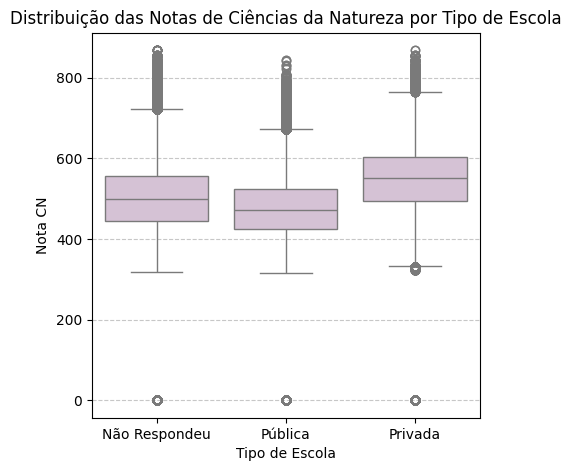

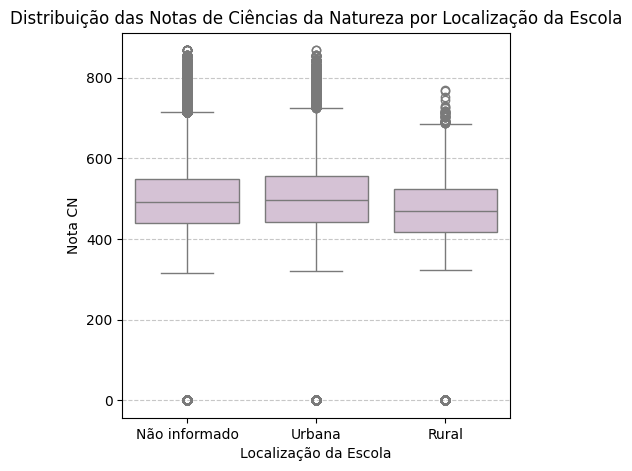

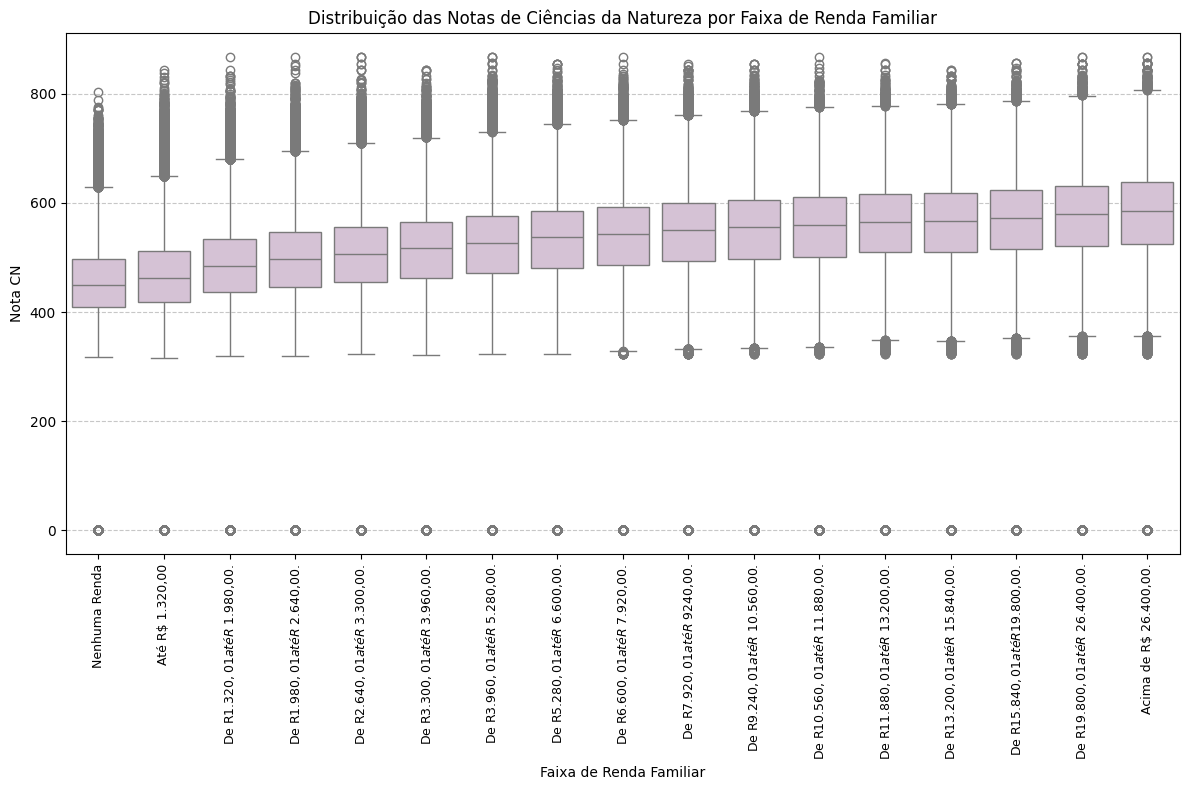


Distribuição percentual de outliers por tipo de escola:
TP_ESCOLA
Não Respondeu    71.720749
Pública          15.799154
Privada          12.480097
Name: proportion, dtype: float64

Estatísticas descritivas dos outliers:
count    36426.00000
mean       407.36027
std        372.10926
min          0.00000
25%          0.00000
50%        720.30000
75%        742.80000
max        868.40000
Name: NU_NOTA_CN, dtype: float64


In [4]:
# Calculando quartis e limites para outliers
Q1 = df_limpo['NU_NOTA_CN'].quantile(0.25)
Q3 = df_limpo['NU_NOTA_CN'].quantile(0.75)

limite_inferior = Q1 - 1.5 * (Q3 - Q1)
limite_superior = Q3 + 1.5 * (Q3 - Q1)

# Identificando outliers
outliers = df_limpo[(df_limpo['NU_NOTA_CN'] < limite_inferior) | (df_limpo['NU_NOTA_CN'] > limite_superior)]
print(f"Número de outliers: {len(outliers)}")
print(f"Percentual de outliers: {(len(outliers) / len(df_limpo)) * 100:.2f}%")

# Análise por tipo de escola
plt.figure(figsize=(5, 5))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_CN', data=df_limpo, color='#D8BFD8')
plt.title('Distribuição das Notas de Ciências da Natureza por Tipo de Escola')
plt.ylabel('Nota CN')
plt.xlabel('Tipo de Escola')
# plt.yticks(range(0, 901, 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n" * 3)

# Análise por localização da escola
plt.figure(figsize=(5, 5))
sns.boxplot(x='TP_LOCALIZACAO_ESC', y='NU_NOTA_CN', data=df_limpo, color='#D8BFD8')
plt.title('Distribuição das Notas de Ciências da Natureza por Localização da Escola')
plt.ylabel('Nota CN')
plt.xlabel('Localização da Escola')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n" * 3)

# Análise por renda familiar (precisamos tratar essa coluna)
# Verificando as categorias disponíveis para renda familiar
ordem = ["Nenhuma Renda", "Até R$ 1.320,00", "De R$ 1.320,01 até R$ 1.980,00.", "De R$ 1.980,01 até R$ 2.640,00.", "De R$ 2.640,01 até R$ 3.300,00.", "De R$ 3.300,01 até R$ 3.960,00.", "De R$ 3.960,01 até R$ 5.280,00.", "De R$ 5.280,01 até R$ 6.600,00.", "De R$ 6.600,01 até R$ 7.920,00.", "De R$ 7.920,01 até R$ 9240,00.", "De R$ 9.240,01 até R$ 10.560,00.", "De R$ 10.560,01 até R$ 11.880,00.", "De R$ 11.880,01 até R$ 13.200,00.", "De R$ 13.200,01 até R$ 15.840,00.", "De R$ 15.840,01 até R$19.800,00.", "De R$ 19.800,01 até R$ 26.400,00.", "Acima de R$ 26.400,00."]
if 'Q006' in df_limpo.columns:
    # print(df_limpo['Q006'].value_counts())

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Q006', y='NU_NOTA_CN', data=df_limpo, order = ordem,  color='#D8BFD8')
    plt.title('Distribuição das Notas de Ciências da Natureza por Faixa de Renda Familiar')
    plt.ylabel('Nota CN')
    plt.xlabel('Faixa de Renda Familiar')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=90, fontsize = 9)
    plt.tight_layout()
    plt.show()

# Resumo estatístico dos outliers por tipo de escola
outliers_por_escola = outliers['TP_ESCOLA'].value_counts(normalize=True) * 100
print("\nDistribuição percentual de outliers por tipo de escola:")
print(outliers_por_escola)


# Análise descritiva dos outliers
print("\nEstatísticas descritivas dos outliers:")
print(outliers['NU_NOTA_CN'].describe())


###Interpretação dos resultados

Tipo de escola

Nas escolas privadas tem menor quantidade de outliers e eles são menos dispersos.
Existem mais outliers acima do limite superior do que nos limites inferiores. - As notas muito baixas são menos frequentes ou, ao menos, não são tão extremas.
A mediana mais baixa é a de alunos de escolas públicas e a mais alta é nas escolas privadas.
A mediana da escola pública não atingiu nem o 1º quartil da escola privada, indicando que as notas dos alunos de escolas públicas estão significativamente mais baixas em comparação com as de escolas privadas.
Localização

A distribuição quanto a localização das escolas é mais alinhada
A quantidade de outliers em escolas rurais é bem menor que nas escolas urbanas.
As distribuições dos não informados e dos urbanos é bem parecida, podendo indicar que possivelmente aqueles que não informaram o tipo de escola são de escolas urbanas.
Renda

A mediana e os quartis aumentam a medida que a renda aumenta.
As faixas de renda mais altas geralmente apresentam mais outliers com notas altas.
Tanto a faixa de renda mais baixa quanto a categoria "Nenhuma Renda" apresentam menos outliers com notas altas.
Todas as faixas de renda mostram outliers com notas muito baixas (perto de zero).
Sendo assim, Os alunos de escolas privadas tendem a gerar mais outliers com notas altas em comparação com as escolas públicas, sugerindo o acesso a melhores recursos educacionais, professores especializados ou currículos de ciências mais fortes, As escolas urbanas apresentam um número ligeiramente maior de outliers com notas altas em comparação com as escolas rurais, possivelmente refletindo diferenças em infraestrutura, qualificação dos professores ou acesso a laboratórios de ciências e recursos de aprendizagem e Há uma correlação visível entre a renda familiar e a presença de outliers com notas altas, com as faixas de renda média a alta mostrando mais altos desempenhos. Isso sugere vantagens socioeconômicas, como acesso a melhores materiais de estudo, tutoria, programas extracurriculares ou menor necessidade de trabalhar enquanto estudam.

##Relação entre a idade dos participantes e o desempenho na prova

###Código


#### 1.2 Relação entre a idade do candidato e sua nota em Ciências da Natureza


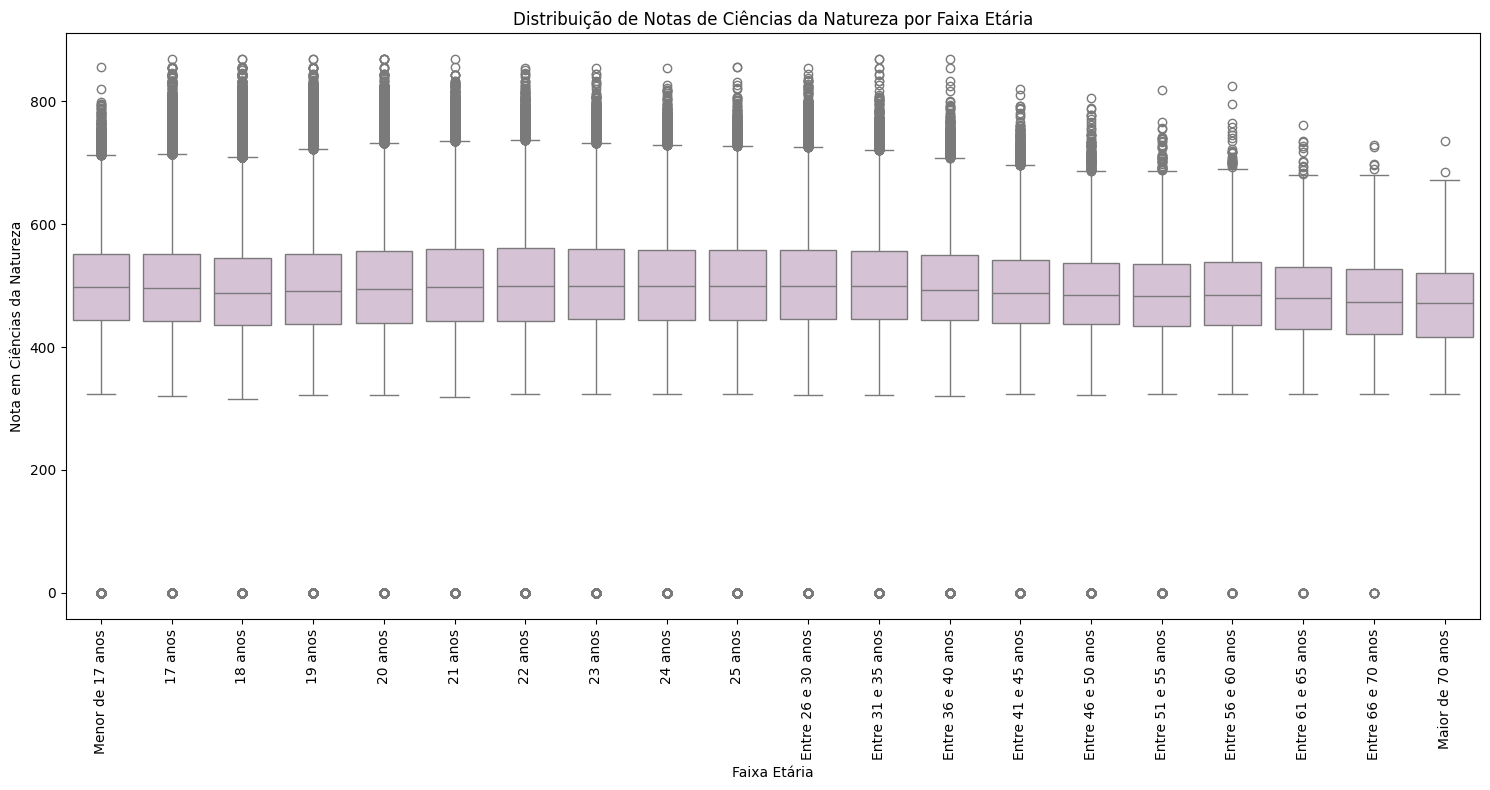


Estatísticas de notas por faixa etária:
       TP_FAIXA_ETARIA        mean  median        std
0              17 anos  496.116692   495.6  84.651018
1              18 anos  491.562864   488.8  85.298375
2              19 anos  495.359476   491.1  90.907902
3              20 anos  500.158151   495.1  93.936409
4              21 anos  502.898240   498.3  95.336057
5              22 anos  503.824270   500.2  94.809753
6              23 anos  503.295283   499.9  93.543533
7              24 anos  502.323758   499.8  91.102002
8              25 anos  501.159969   499.3  92.464795
9   Entre 26 e 30 anos  500.735796   499.6  92.045124
10  Entre 31 e 35 anos  499.970274   499.0  89.646931
11  Entre 36 e 40 anos  495.286794   493.5  87.470110
12  Entre 41 e 45 anos  488.431735   487.4  86.273530
13  Entre 46 e 50 anos  485.952054   485.2  81.544641
14  Entre 51 e 55 anos  483.653346   483.8  82.035563
15  Entre 56 e 60 anos  485.517140   485.2  81.699649
16  Entre 61 e 65 anos  479.657952   480.

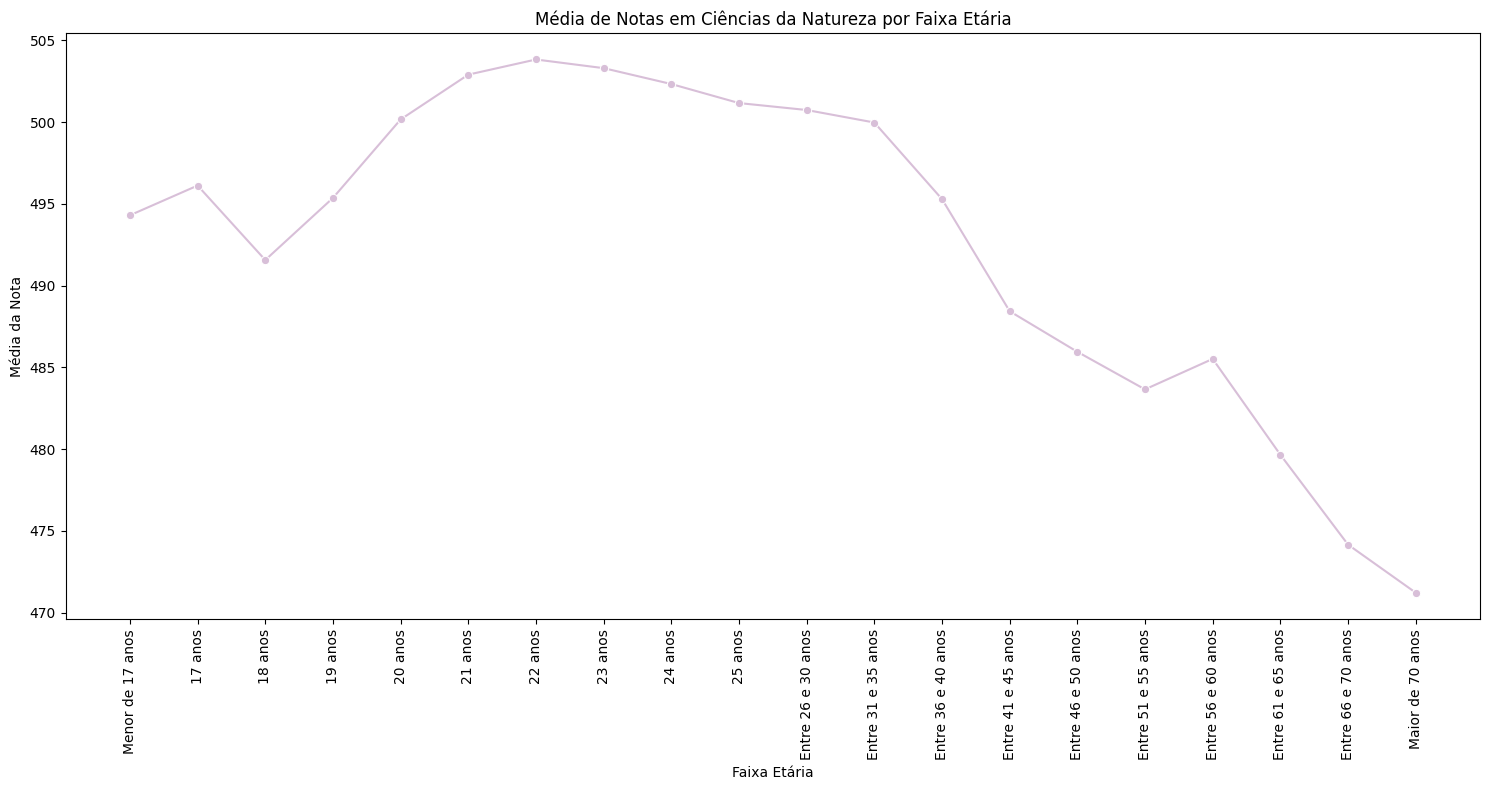

In [5]:
print("\n#### 1.2 Relação entre a idade do candidato e sua nota em Ciências da Natureza")
ordem = ["Menor de 17 anos", "17 anos","18 anos", "19 anos", "20 anos", "21 anos", "22 anos", "23 anos", "24 anos", "25 anos", "Entre 26 e 30 anos", "Entre 31 e 35 anos", "Entre 36 e 40 anos", "Entre 41 e 45 anos", "Entre 46 e 50 anos", "Entre 51 e 55 anos", "Entre 56 e 60 anos", "Entre 61 e 65 anos", "Entre 66 e 70 anos", "Maior de 70 anos"]
# Verificando a relação entre faixa etária e nota em CN
plt.figure(figsize=(15, 8))
sns.boxplot(x='TP_FAIXA_ETARIA', y='NU_NOTA_CN', data=df_limpo, order = ordem, color='#D8BFD8')
plt.title('Distribuição de Notas de Ciências da Natureza por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Nota em Ciências da Natureza')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculando a média, mediana e desvio padrão por faixa etária
estatisticas_idade = df_limpo.groupby('TP_FAIXA_ETARIA')['NU_NOTA_CN'].agg(['mean', 'median', 'std']).reset_index()
print("\nEstatísticas de notas por faixa etária:")
print(estatisticas_idade)

# Garantindo que a coluna 'TP_FAIXA_ETARIA' tenha uma ordem categórica
estatisticas_idade['TP_FAIXA_ETARIA'] = pd.Categorical(estatisticas_idade['TP_FAIXA_ETARIA'], categories=ordem, ordered=True)

# Reorganizando os dados com base na ordem definida
estatisticas_idade = estatisticas_idade.sort_values('TP_FAIXA_ETARIA')

# Criando gráfico de linha para mostrar a tendência da média de notas por faixa etária
plt.figure(figsize=(15, 8))
sns.lineplot(x='TP_FAIXA_ETARIA', y='mean', data=estatisticas_idade, marker='o', color='#D8BFD8')
plt.title('Média de Notas em Ciências da Natureza por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média da Nota')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


###Interpretação dos resultados

A análise dos dados revela uma clara tendência no desempenho dos participantes do Enem conforme a idade. Observa-se que os resultados médios aumentam gradualmente entre as idades de 18 a 23 anos, estabilizam-se até aproximadamente os 35 anos, com um leve declínio nesse intervalo e passam a cair de forma mais acentuada a partir dessa faixa. Esse comportamento segue um padrão de "U invertido", no qual o melhor desempenho se concentra nas idades intermediárias, enquanto os extremos da distribuição (participantes muito jovens ou mais velhos) tendem a apresentar resultados inferiores. Especificamente, os candidatos de 22 anos registram o melhor desempenho médio, e a partir dessa idade, quanto mais velho o participante, menor tende a ser sua nota na prova de Ciências da Natureza.

Em relação à distribuição de desempenho por faixa etária, jovens com menos de 20 anos apresentam um crescimento gradual nas médias à medida que a idade aumenta, com pontuações situadas entre 490 e 500 pontos. Na faixa dos 20 aos 35 anos, os participantes demonstram o melhor desempenho médio geral, com destaque para os 22 anos, onde se atinge o pico de 504 pontos. Nessa faixa também há maior presença de outliers com altos desempenhos. Entre os adultos de 36 a 50 anos, nota-se um declínio progressivo na média das notas, com queda mais expressiva após os 40 anos. Já entre os candidatos com mais de 50 anos, o desempenho tende a diminuir de forma ainda mais acentuada, com médias inferiores a 480 pontos a partir dos 55 anos.


##Distribuição das notas de Ciências da Natureza por faixa de renda

###Código

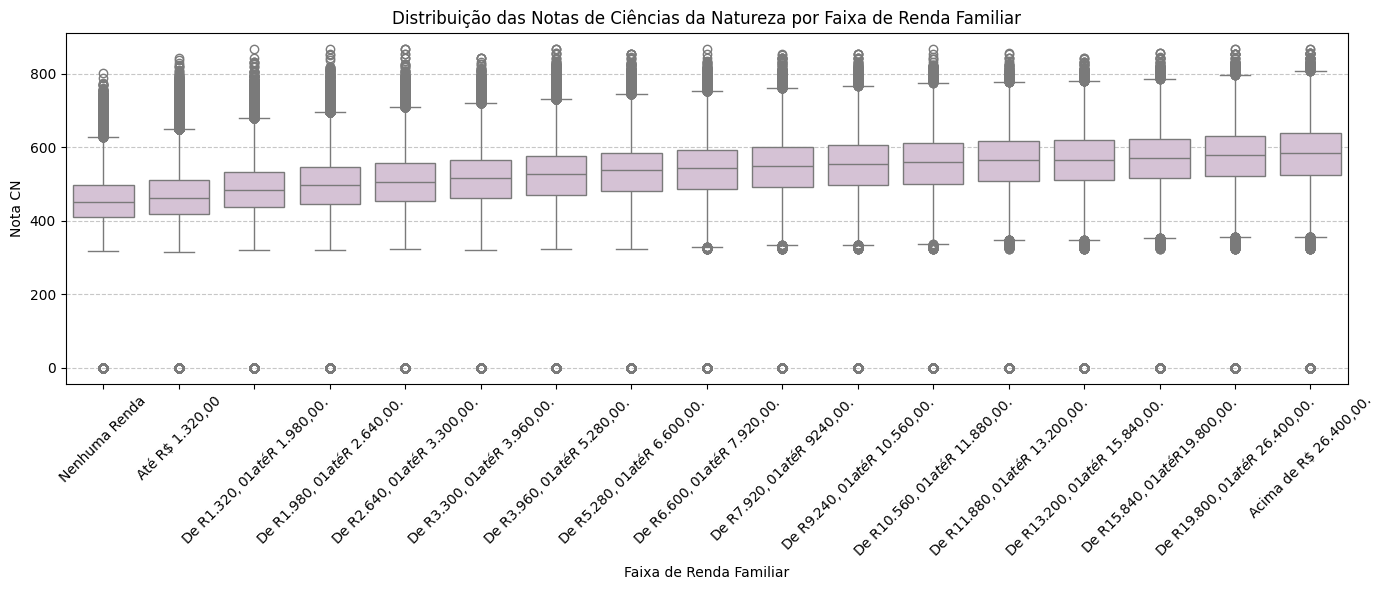


Estatísticas de notas por faixa de renda:
                                         mean  median        std   count
Q006                                                                    
Acima de R$ 26.400,00.             576.992983   584.3  97.879527   42314
Até R$ 1.320,00                    464.103581   462.7  76.380896  783598
De R$ 1.320,01 até R$ 1.980,00.    483.154949   483.6  79.379457  416437
De R$ 1.980,01 até R$ 2.640,00.    494.505980   496.4  80.619716  297156
De R$ 10.560,01 até R$ 11.880,00.  554.156952   559.3  91.836247   33042
De R$ 11.880,01 até R$ 13.200,00.  560.965913   565.5  90.111689   28254
De R$ 13.200,01 até R$ 15.840,00.  562.426105   566.7  91.641510   34951
De R$ 15.840,01 até R$19.800,00.   567.449811   571.7  92.290258   34743
De R$ 19.800,01 até R$ 26.400,00.  573.671685   578.9  93.584386   32170
De R$ 2.640,01 até R$ 3.300,00.    504.519018   506.8  81.902939  210393
De R$ 3.300,01 até R$ 3.960,00.    513.557355   516.6  83.915598  127747
De R$ 3.

<ipython-input-6-59a249c4d752>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatisticas_por_renda = df_limpo.groupby('Q006')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count']).reset_index()


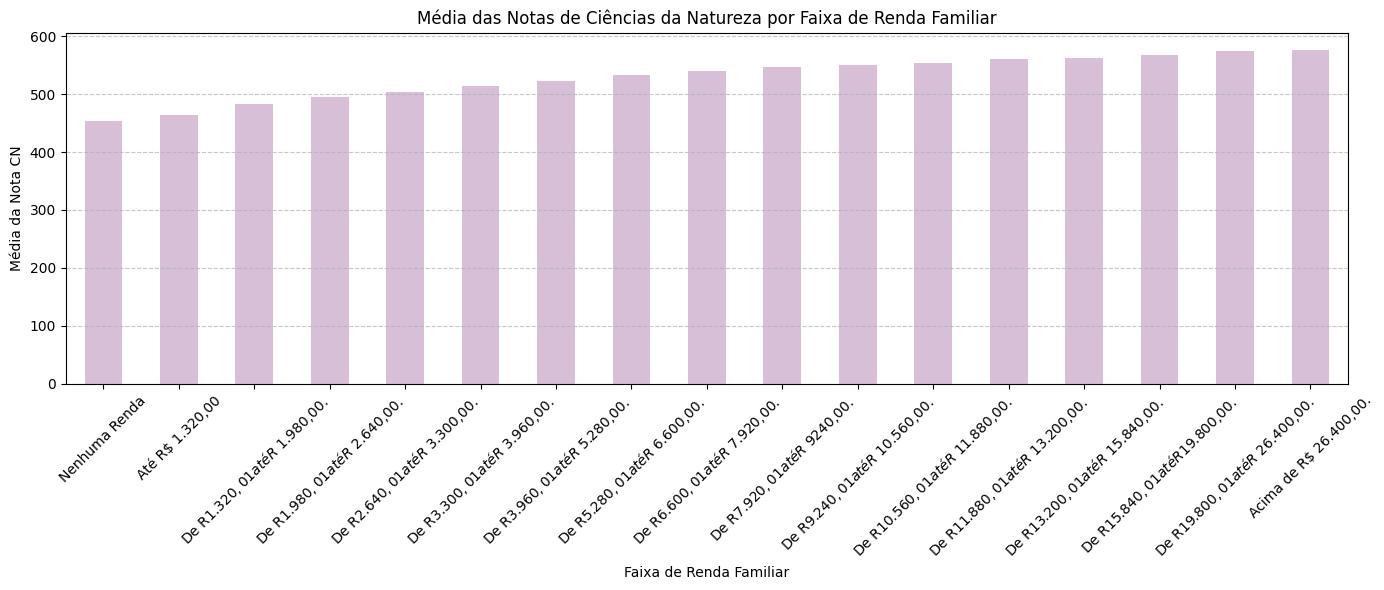

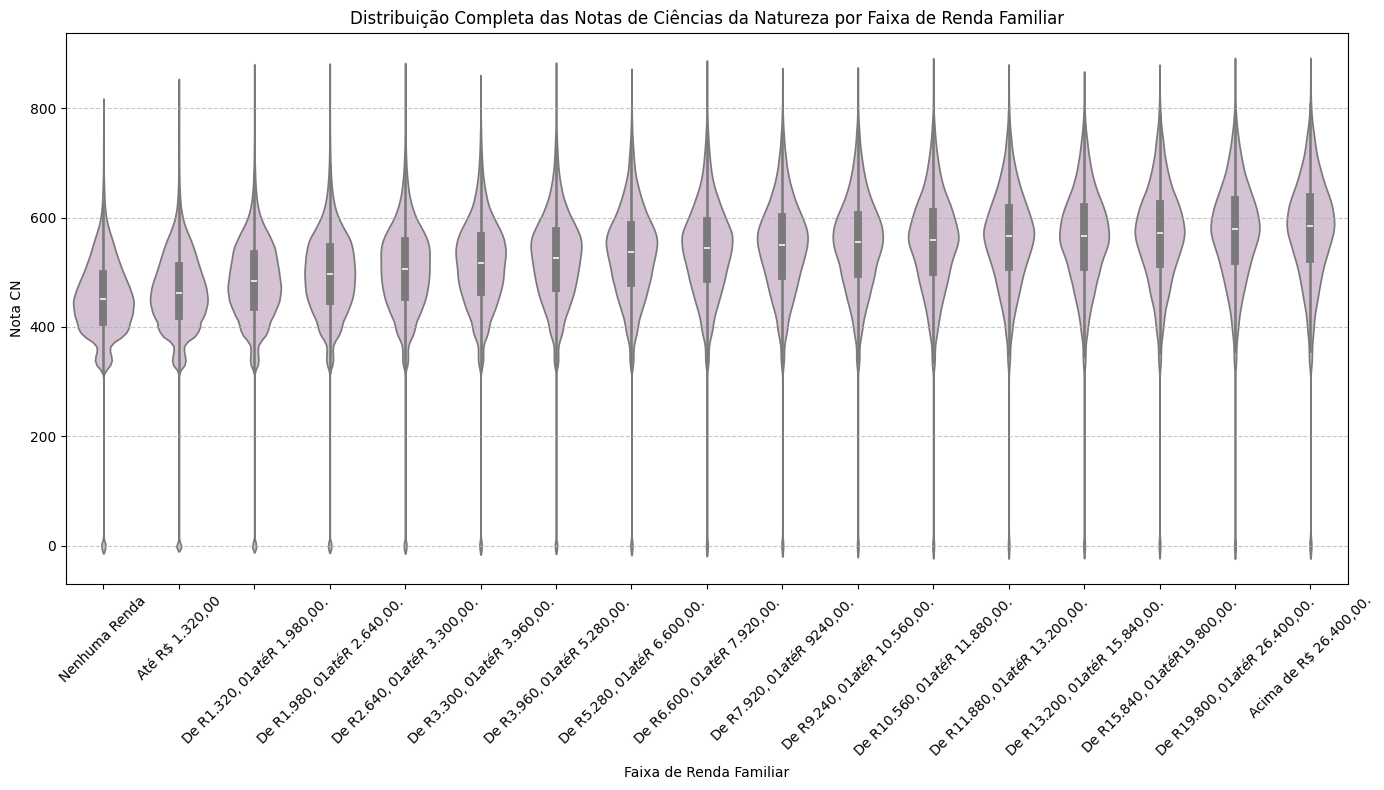

In [6]:
ordem = [
    "Nenhuma Renda",
    "Até R$ 1.320,00",
    "De R$ 1.320,01 até R$ 1.980,00.",
    "De R$ 1.980,01 até R$ 2.640,00.",
    "De R$ 2.640,01 até R$ 3.300,00.",
    "De R$ 3.300,01 até R$ 3.960,00.",
    "De R$ 3.960,01 até R$ 5.280,00.",
    "De R$ 5.280,01 até R$ 6.600,00.",
    "De R$ 6.600,01 até R$ 7.920,00.",
    "De R$ 7.920,01 até R$ 9240,00.",
    "De R$ 9.240,01 até R$ 10.560,00.",
    "De R$ 10.560,01 até R$ 11.880,00.",
    "De R$ 11.880,01 até R$ 13.200,00.",
    "De R$ 13.200,01 até R$ 15.840,00.",
    "De R$ 15.840,01 até R$19.800,00.",
    "De R$ 19.800,01 até R$ 26.400,00.",
    "Acima de R$ 26.400,00."
    ]

# Análise da correlação entre renda e nota
plt.figure(figsize=(14, 6))
sns.boxplot(x='Q006', y='NU_NOTA_CN', data=df_limpo, order=ordem,color='#D8BFD8')
plt.title('Distribuição das Notas de Ciências da Natureza por Faixa de Renda Familiar')
plt.ylabel('Nota CN')
plt.xlabel('Faixa de Renda Familiar')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Estatísticas descritivas por faixa de renda
estatisticas_por_renda = df_limpo.groupby('Q006')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count'])
print("\nEstatísticas de notas por faixa de renda:")
print(estatisticas_por_renda)

df_limpo['Q006'] = pd.Categorical(df_limpo['Q006'], categories=ordem, ordered=True)

# Estatísticas descritivas por faixa de renda
estatisticas_por_renda = df_limpo.groupby('Q006')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count']).reset_index()
estatisticas_por_renda['Q006'] = pd.Categorical(estatisticas_por_renda['Q006'], categories=ordem, ordered=True)
estatisticas_por_renda = estatisticas_por_renda.sort_values('Q006')

# Visualizando a média das notas por faixa de renda
plt.figure(figsize=(14, 6))
estatisticas_por_renda['mean'].plot(kind='bar', color='#D8BFD8')
plt.title('Média das Notas de Ciências da Natureza por Faixa de Renda Familiar')
plt.ylabel('Média da Nota CN')
plt.xlabel('Faixa de Renda Familiar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(len(ordem)), labels=ordem, rotation=45)
plt.tight_layout()
plt.show()

# Violin plot para análise completa da distribuição
plt.figure(figsize=(14, 8))
sns.violinplot(x='Q006', y='NU_NOTA_CN', data=df_limpo, order=ordem, color='#D8BFD8')
plt.title('Distribuição Completa das Notas de Ciências da Natureza por Faixa de Renda Familiar')
plt.ylabel('Nota CN')
plt.xlabel('Faixa de Renda Familiar')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###Interpretação dos resultados

A análise mostra que há uma relação clara entre renda familiar e desempenho na prova de Ciências da Natureza. À medida que a renda aumenta, as notas médias também sobem, especialmente nas faixas de renda mais altas, onde os candidatos alcançam médias próximas a 570 pontos. Quem tem renda entre R\$ 11.880,00 e R\$ 19.800,00 também se destaca, com médias entre 550 e 560 pontos. No entanto, nas faixas mais ricas, o crescimento nas notas se torna mais lento, sugerindo que, após certo nível de renda, o impacto no desempenho é menor.

Os candidatos sem renda apresentam as menores médias, em torno de 460 pontos, com forte concentração de notas baixas. Já nas faixas intermediárias, como entre R\$ 2.640,00 e R\$ 6.600,00, há uma melhora gradual nas notas. Acima de R\$ 10.560,00, as notas são consistentemente mais altas e a presença de notas muito baixas é menor. Além disso, os gráficos mostram que, quanto maior a renda, maior é o "piso" de desempenho, ou seja, mesmo os estudantes com notas mais baixas dentro dessas faixas tendem a ir melhor. Apesar dessa tendência, ainda há bastante variação nos resultados em todas as faixas, o que indica que outros fatores também influenciam o desempenho.


#Fatores Econômicos

##Impacto da escolaridade dos pais no desempenho dos estudantes

###Código


Colunas relacionadas à escolaridade dos pais:
['Q001', 'Q002']


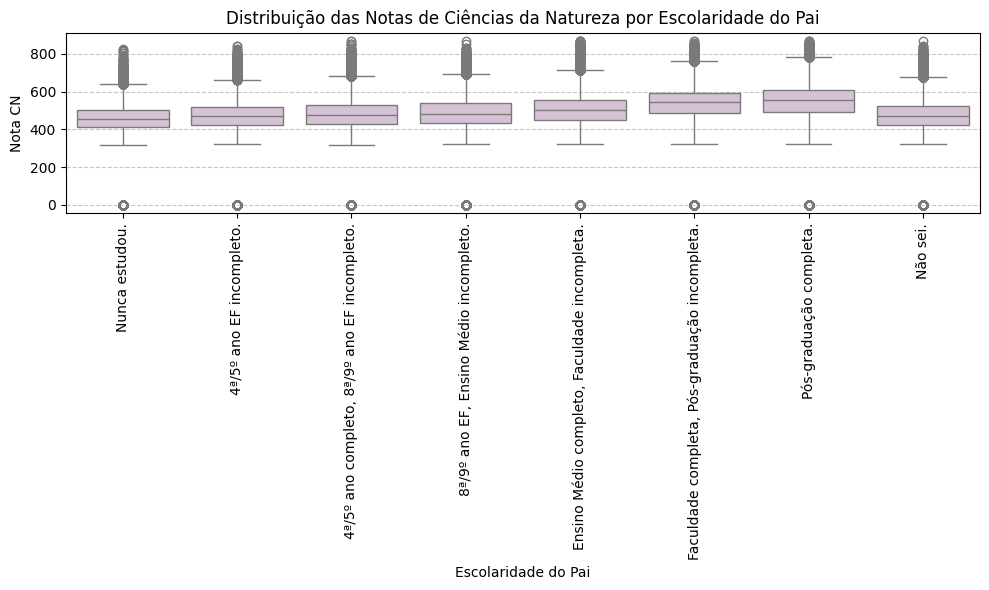

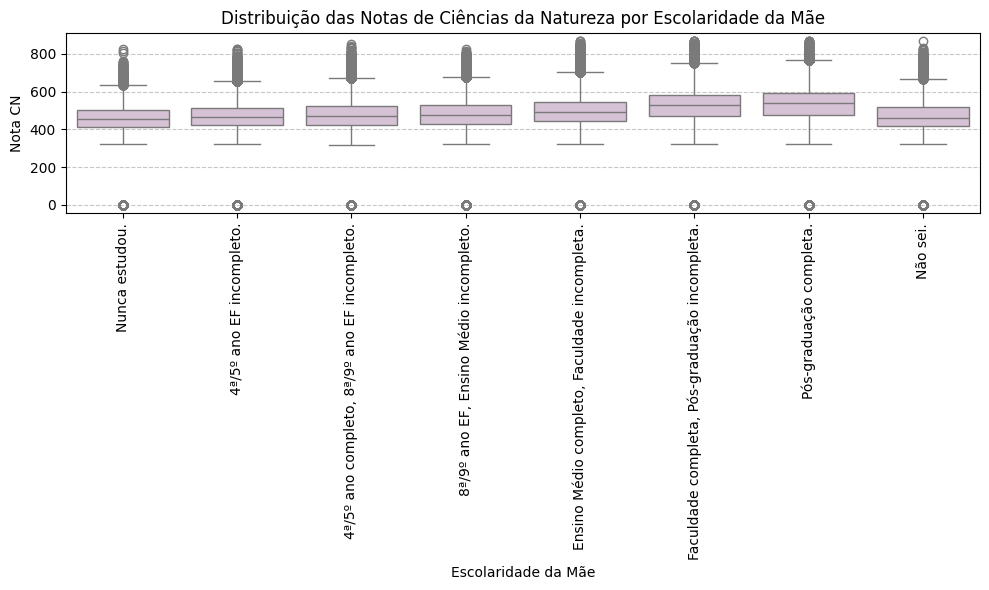


Estatísticas de notas por escolaridade do pai:
                                                     mean  median        std  \
Q001                                                                           
4ª/5º ano EF incompleto.                       470.524419   469.1  78.553556   
4ª/5º ano completo, 8ª/9º ano EF incompleto.   480.056081   478.8  81.085414   
8ª/9º ano EF, Ensino Médio incompleto.         485.108846   484.2  82.932571   
Ensino Médio completo, Faculdade incompleta.   500.739206   501.2  84.741496   
Faculdade completa, Pós-graduação incompleta.  539.772581   543.4  89.999878   
Nunca estudou.                                 457.774761   456.1  76.790818   
Não sei.                                       474.389310   473.4  82.546270   
Pós-graduação completa.                        550.665610   555.3  93.288534   

                                                count  
Q001                                                   
4ª/5º ano EF incompleto.               

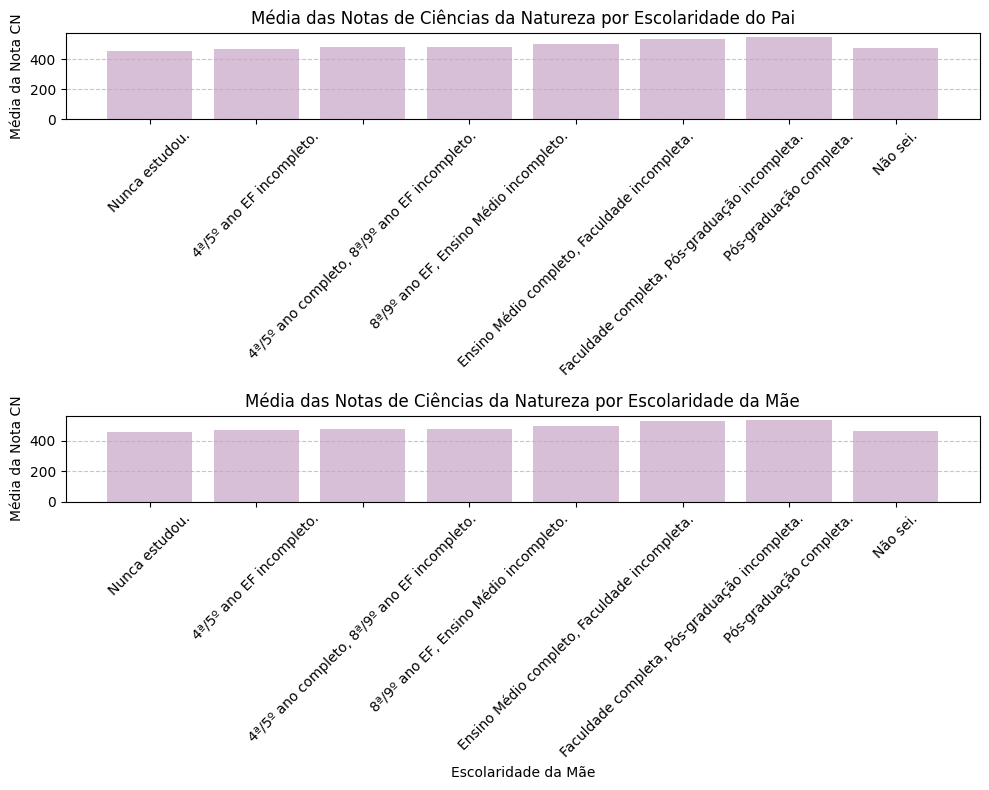

In [7]:
# Verificando se temos as colunas de escolaridade dos pais
colunas_escolaridade = [col for col in df_limpo.columns if 'Q001' in col or 'Q002' in col]
print("\nColunas relacionadas à escolaridade dos pais:")
print(colunas_escolaridade)

if 'Q001' in df_limpo.columns and 'Q002' in df_limpo.columns:
    ordem = ["Nunca estudou.", "4ª/5º ano EF incompleto.", "4ª/5º ano completo, 8ª/9º ano EF incompleto.", "8ª/9º ano EF, Ensino Médio incompleto.", "Ensino Médio completo, Faculdade incompleta.", "Faculdade completa, Pós-graduação incompleta.", "Pós-graduação completa.", "Não sei."]
    # Análise da escolaridade do pai
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Q001', y='NU_NOTA_CN', data=df_limpo, color='#D8BFD8', order= ordem)
    plt.title('Distribuição das Notas de Ciências da Natureza por Escolaridade do Pai')
    plt.ylabel('Nota CN')
    plt.xlabel('Escolaridade do Pai')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Análise da escolaridade da mãe
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Q002', y='NU_NOTA_CN', data=df_limpo, color='#D8BFD8', order= ordem)
    plt.title('Distribuição das Notas de Ciências da Natureza por Escolaridade da Mãe')
    plt.ylabel('Nota CN')
    plt.xlabel('Escolaridade da Mãe')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Estatísticas por escolaridade do pai
    estatisticas_escolaridade_pai = df_limpo.groupby('Q001')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count'])
    print("\nEstatísticas de notas por escolaridade do pai:")
    print(estatisticas_escolaridade_pai)

    # Estatísticas por escolaridade da mãe
    estatisticas_escolaridade_mae = df_limpo.groupby('Q002')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count'])
    print("\nEstatísticas de notas por escolaridade da mãe:")
    print(estatisticas_escolaridade_mae)

    # Transformando os índices de ambas as tabelas em variáveis categóricas ordenadas
    estatisticas_escolaridade_pai = estatisticas_escolaridade_pai.reset_index()
    estatisticas_escolaridade_mae = estatisticas_escolaridade_mae.reset_index()

    estatisticas_escolaridade_pai['Q001'] = pd.Categorical(
        estatisticas_escolaridade_pai['Q001'], categories=ordem, ordered=True
    )

    estatisticas_escolaridade_mae['Q002'] = pd.Categorical(
        estatisticas_escolaridade_mae['Q002'], categories=ordem, ordered=True
    )

    # Ordenando os dados com base na ordem categórica
    estatisticas_escolaridade_pai = estatisticas_escolaridade_pai.sort_values('Q001')
    estatisticas_escolaridade_mae = estatisticas_escolaridade_mae.sort_values('Q002')

    # Criando os gráficos com a ordem definida
    plt.figure(figsize=(10, 8))

    # Gráfico 1: Escolaridade do Pai
    plt.subplot(2, 1, 1)
    plt.bar(estatisticas_escolaridade_pai['Q001'], estatisticas_escolaridade_pai['mean'], color='#D8BFD8')
    plt.title('Média das Notas de Ciências da Natureza por Escolaridade do Pai')
    plt.ylabel('Média da Nota CN')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    # Gráfico 2: Escolaridade da Mãe
    plt.subplot(2, 1, 2)
    plt.bar(estatisticas_escolaridade_mae['Q002'], estatisticas_escolaridade_mae['mean'], color='#D8BFD8')
    plt.title('Média das Notas de Ciências da Natureza por Escolaridade da Mãe')
    plt.ylabel('Média da Nota CN')
    plt.xlabel('Escolaridade da Mãe')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    # Ajustando os espaçamentos
    plt.tight_layout()
    plt.show()

else:
    print("As colunas de escolaridade dos pais (Q001 e Q002) não foram encontradas.")

###Interpretação dos resultados

Os dados mostram que a escolaridade dos pais tem impacto direto no desempenho dos estudantes na prova de Ciências da Natureza. Tanto no caso do pai quanto da mãe, quanto maior o nível de escolaridade, melhor tende a ser a nota média dos filhos.

Estudantes cujos pais possuem pós-graduação apresentam os melhores resultados, e há uma progressão clara nas médias conforme o nível de instrução dos pais aumenta. Além disso, os gráficos indicam que não só as médias sobem, mas também a distribuição das notas é mais favorável entre os alunos com pais mais escolarizados.


#Características da Escola

##Desempenho de alunos de escolas públicas versus privadas em diferentes regiões

###Código

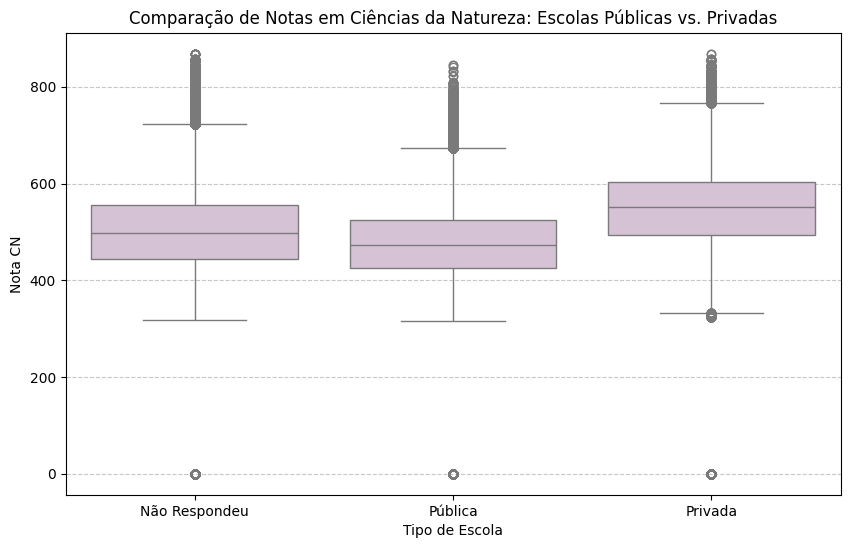

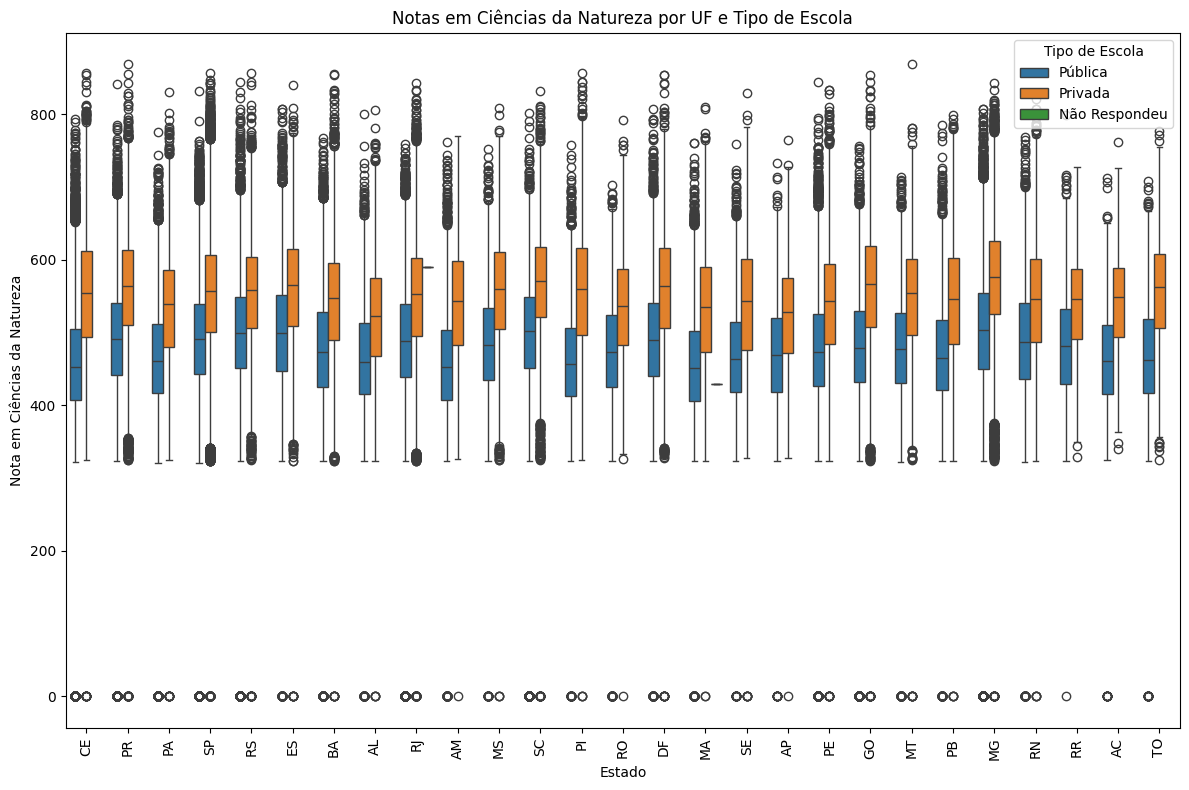


Estatísticas de notas por tipo de escola:
                     mean  median        std    count
TP_ESCOLA                                            
Não Respondeu  499.928945   498.4  89.655859  1637283
Privada        548.465959   552.5  83.989136   221705
Pública        473.522409   473.2  77.727060   833439


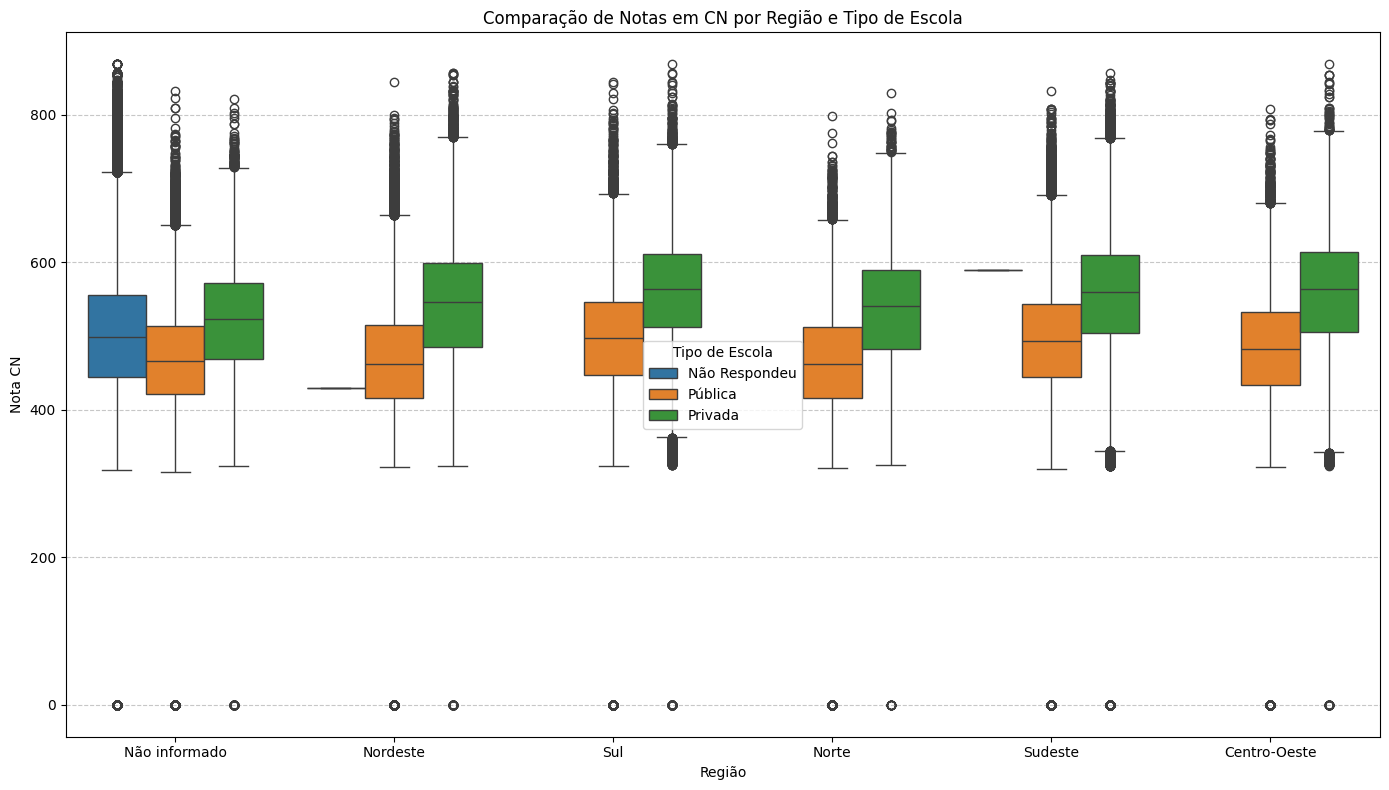


Estatísticas por região e tipo de escola:
           REGIAO      TP_ESCOLA        mean        std    count
0    Centro-Oeste        Privada  558.815517  85.867488    17368
1    Centro-Oeste        Pública  480.611854  78.941115    49520
2        Nordeste  Não Respondeu  429.300000        NaN        1
3        Nordeste        Privada  543.217464  85.376493    46428
4        Nordeste        Pública  464.299692  76.944649   191522
5           Norte        Privada  535.743512  80.992986    10450
6           Norte        Pública  463.164067  76.552721    52795
7   Não informado  Não Respondeu  499.928933  89.655869  1637281
8   Não informado        Privada  519.575254  78.390281    27156
9   Não informado        Pública  465.808090  73.338377   303605
10        Sudeste  Não Respondeu  590.000000        NaN        1
11        Sudeste        Privada  555.965441  82.951612    94408
12        Sudeste        Pública  491.573629  78.982611   165980
13            Sul        Privada  559.024773  8

<Figure size 1200x600 with 0 Axes>

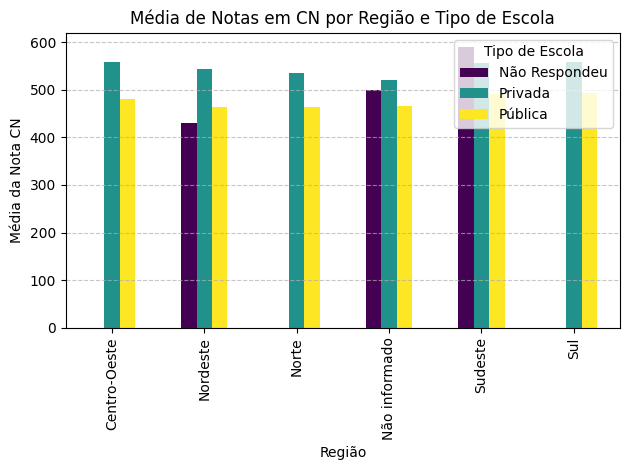

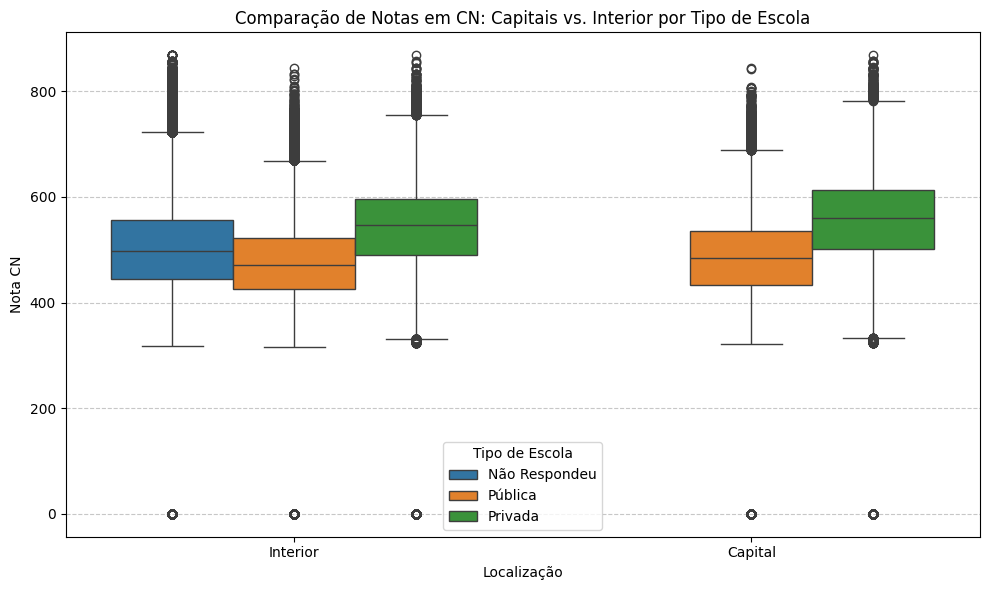


Estatísticas por capital/interior e tipo de escola:
    CAPITAL      TP_ESCOLA        mean        std    count
0   Capital        Privada  557.162101  87.225466    85582
1   Capital        Pública  483.483210  80.264409   122658
2  Interior  Não Respondeu  499.928945  89.655859  1637283
3  Interior        Privada  542.998601  81.415096   136123
4  Interior        Pública  471.803494  77.150823   710781

Diferença percentual entre escolas privadas e públicas por região:
TP_ESCOLA      diferenca_percentual_relativa
REGIAO                                      
Nordeste                           16.997162
Centro-Oeste                       16.271688
Norte                              15.670353
Sul                                13.575540
Sudeste                            13.099118
Não informado                      11.542772

Diferença percentual entre escolas privadas e públicas por capital/interior:
TP_ESCOLA  diferenca_percentual_relativa
CAPITAL                                 
Capit

In [8]:
# Comparação básica entre escolas públicas e privadas
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_CN', data=df_limpo, color='#D8BFD8')
plt.title('Comparação de Notas em Ciências da Natureza: Escolas Públicas vs. Privadas')
plt.ylabel('Nota CN')
plt.xlabel('Tipo de Escola')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('\n')

# Comparação por região
plt.figure(figsize=(12, 8))
sns.boxplot(x='SG_UF_ESC', y='NU_NOTA_CN', hue='TP_ESCOLA', data=df_limpo[df_limpo['SG_UF_ESC'] != 'Não informado'])
plt.title('Notas em Ciências da Natureza por UF e Tipo de Escola')
plt.xlabel('Estado')
plt.ylabel('Nota em Ciências da Natureza')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Escola')
plt.tight_layout()
plt.show()

# Estatísticas descritivas por tipo de escola
estatisticas_por_escola = df_limpo.groupby('TP_ESCOLA')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count'])
print("\nEstatísticas de notas por tipo de escola:")
print(estatisticas_por_escola)

# Análise por região (verificando se varia mais em determinadas regiões)
regioes = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MS', 'MT'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

# Função para mapear UF para região
def mapear_regiao(uf):
    for regiao, ufs in regioes.items():
        if uf in ufs:
            return regiao
    return "Não informado"

# Aplicando a função para criar a coluna de região
df_limpo['REGIAO'] = df_limpo['SG_UF_ESC'].apply(mapear_regiao)

# Comparação entre escolas públicas e privadas por região
plt.figure(figsize=(14, 8))
sns.boxplot(x='REGIAO', y='NU_NOTA_CN', hue='TP_ESCOLA', data=df_limpo)
plt.title('Comparação de Notas em CN por Região e Tipo de Escola')
plt.ylabel('Nota CN')
plt.xlabel('Região')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Escola')
plt.tight_layout()
plt.show()

# Estatísticas por região e tipo de escola
estatisticas_regiao_escola = df_limpo.groupby(['REGIAO', 'TP_ESCOLA'])['NU_NOTA_CN'].agg(['mean', 'std', 'count']).reset_index()
print("\nEstatísticas por região e tipo de escola:")
print(estatisticas_regiao_escola)

# Gráfico de barras para visualizar a diferença média por região
plt.figure(figsize=(12, 6))
regiao_pivot = estatisticas_regiao_escola.pivot(index='REGIAO', columns='TP_ESCOLA', values='mean')
regiao_pivot.plot(kind='bar', colormap='viridis')
plt.title('Média de Notas em CN por Região e Tipo de Escola')
plt.ylabel('Média da Nota CN')
plt.xlabel('Região')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Escola')
plt.tight_layout()
plt.show()

# Comparação entre capitais e interior
# Identificando capitais brasileiras
capitais = [
    'Rio Branco', 'Maceió', 'Macapá', 'Manaus', 'Salvador', 'Fortaleza',
    'Brasília', 'Vitória', 'Goiânia', 'São Luís', 'Cuiabá', 'Campo Grande',
    'Belo Horizonte', 'Belém', 'João Pessoa', 'Curitiba', 'Recife', 'Teresina',
    'Rio de Janeiro', 'Natal', 'Porto Alegre', 'Porto Velho', 'Boa Vista',
    'Florianópolis', 'São Paulo', 'Aracaju', 'Palmas'
]

# Criando coluna para identificar capitais
df_limpo['CAPITAL'] = df_limpo['NO_MUNICIPIO_ESC'].apply(lambda x: 'Capital' if x in capitais else 'Interior')

print('\n')

# Comparação entre capitais e interior por tipo de escola
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAPITAL', y='NU_NOTA_CN', hue='TP_ESCOLA', data=df_limpo)
plt.title('Comparação de Notas em CN: Capitais vs. Interior por Tipo de Escola')
plt.ylabel('Nota CN')
plt.xlabel('Localização')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Escola')
plt.tight_layout()
plt.show()

# Estatísticas por capital/interior e tipo de escola
estatisticas_capital_escola = df_limpo.groupby(['CAPITAL', 'TP_ESCOLA'])['NU_NOTA_CN'].agg(['mean', 'std', 'count']).reset_index()
print("\nEstatísticas por capital/interior e tipo de escola:")
print(estatisticas_capital_escola)

# Calculando a diferença percentual entre escolas públicas e privadas
def calcular_diferenca_percentual(grupo):
    try:
        nota_privada = grupo.loc[grupo['TP_ESCOLA'] == 'Privada', 'mean'].values[0]
        nota_publica = grupo.loc[grupo['TP_ESCOLA'] == 'Pública', 'mean'].values[0]
        return ((nota_privada - nota_publica) / nota_publica) * 100
    except:
        return None

# Aplicando para as regiões
estatisticas_regiao_pivot = estatisticas_regiao_escola.pivot(index='REGIAO', columns='TP_ESCOLA', values='mean')
estatisticas_regiao_pivot['diferenca_percentual'] = estatisticas_regiao_pivot['Privada'] - estatisticas_regiao_pivot['Pública']
estatisticas_regiao_pivot['diferenca_percentual_relativa'] = (estatisticas_regiao_pivot['diferenca_percentual'] / estatisticas_regiao_pivot['Pública']) * 100

print("\nDiferença percentual entre escolas privadas e públicas por região:")
print(estatisticas_regiao_pivot[['diferenca_percentual_relativa']].sort_values('diferenca_percentual_relativa', ascending=False))

# Aplicando para capital vs interior
estatisticas_capital_pivot = estatisticas_capital_escola.pivot(index='CAPITAL', columns='TP_ESCOLA', values='mean')
estatisticas_capital_pivot['diferenca_percentual'] = estatisticas_capital_pivot['Privada'] - estatisticas_capital_pivot['Pública']
estatisticas_capital_pivot['diferenca_percentual_relativa'] = (estatisticas_capital_pivot['diferenca_percentual'] / estatisticas_capital_pivot['Pública']) * 100

print("\nDiferença percentual entre escolas privadas e públicas por capital/interior:")
print(estatisticas_capital_pivot[['diferenca_percentual_relativa']])

###Interpretação dos resultados

Sim, existe uma diferença significativa entre o desempenho dos alunos de escolas públicas e privadas na prova de Ciências da Natureza. Os dados mostram que alunos de escolas privadas obtêm notas mais altas do que os de escolas públicas. A análise por boxplot revela que a mediana das notas dos alunos de escolas privadas é consideravelmente mais alta, com todo o intervalo interquartil (a “caixa” do boxplot) posicionado acima do das escolas públicas. A diferença entre as medianas gira em torno de 100 pontos.

Além disso, o desempenho varia entre as regiões do Brasil. A região Sul apresenta uma das maiores diferenças entre os tipos de escola, enquanto as regiões Centro-Oeste e Sudeste também demonstram disparidades significativas. A região Nordeste apresenta uma diferença um pouco menor em comparação às demais, mas ainda bastante expressiva. Estados como Santa Catarina, Paraná, Minas Gerais e o Distrito Federal se destacam por exibirem diferenças mais acentuadas entre escolas públicas e privadas.

Quando analisamos a diferença entre capitais e cidades do interior, observamos que tanto nas capitais quanto no interior as escolas privadas apresentam desempenho superior às públicas. No entanto, essa diferença é ligeiramente maior nas capitais. As escolas privadas localizadas nas capitais tendem a ter um desempenho um pouco superior às do interior, enquanto as escolas públicas mantêm um desempenho similar nos dois contextos, com leve vantagem para as capitais.

Com base nessas análises, é possível concluir que, independentemente da localização geográfica (capital ou interior), o tipo de escola, pública ou privada, exerce maior influência sobre o desempenho dos alunos na prova de Ciências da Natureza.

##Diferenças no desempenho conforme a localização da escola: urbana vs rural

###Código

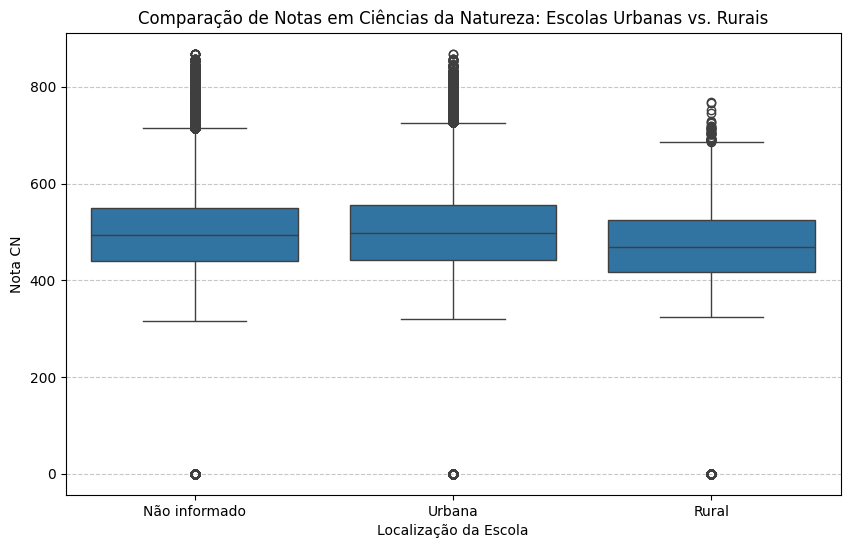


Estatísticas de notas por localização da escola:
                          mean  median        std    count
TP_LOCALIZACAO_ESC                                        
Não informado       494.936284   492.8  88.100795  1968042
Rural               470.327366   468.3  80.921215    24501
Urbana              498.934061   498.0  87.482019   699884

Estatísticas por localização e tipo de escola:
  TP_LOCALIZACAO_ESC      TP_ESCOLA        mean         std    count
0      Não informado  Não Respondeu  499.928933   89.655869  1637281
1      Não informado        Privada  519.575254   78.390281    27156
2      Não informado        Pública  465.808090   73.338377   303605
3              Rural        Privada  519.756656   86.062170      939
4              Rural        Pública  468.357495   80.081774    23562
5             Urbana  Não Respondeu  509.650000  113.632060        2
6             Urbana        Privada  552.657447   83.913133   193610
7             Urbana        Pública  478.388966   79.75

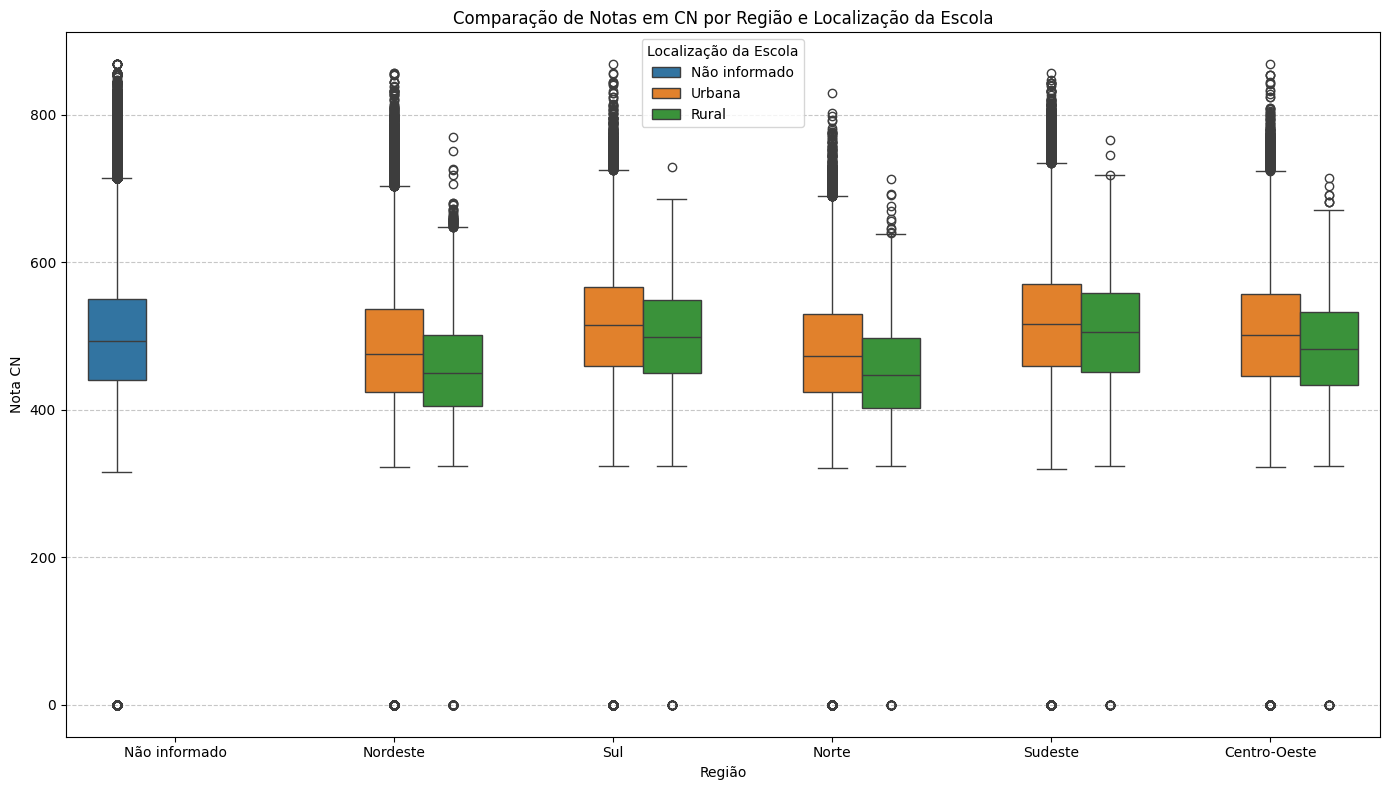


Estatísticas por região e localização da escola:
           REGIAO TP_LOCALIZACAO_ESC        mean        std    count
0    Centro-Oeste              Rural  479.921532  82.366747     2076
1    Centro-Oeste             Urbana  501.590597  87.855999    64812
2        Nordeste              Rural  454.131200  75.908055    11673
3        Nordeste             Urbana  481.016545  84.867781   226278
4           Norte              Rural  449.676386  77.259964     3049
5           Norte             Urbana  476.446995  81.884596    60196
6   Não informado      Não informado  494.936284  88.100795  1968042
7         Sudeste              Rural  503.048456  79.740630     5083
8         Sudeste             Urbana  515.156601  86.301785   255306
9             Sul              Rural  495.435725  80.435830     2620
10            Sul             Urbana  510.661580  88.916297    93292


<Figure size 1200x600 with 0 Axes>

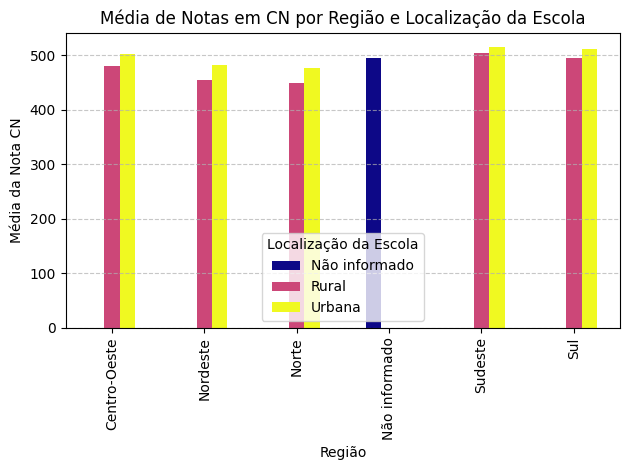


Diferença percentual entre escolas urbanas e rurais por região:
TP_LOCALIZACAO_ESC  diferenca_percentual_relativa
REGIAO                                           
Norte                                    5.953306
Nordeste                                 5.920171
Centro-Oeste                             4.515127
Sul                                      3.073225
Sudeste                                  2.406954
Não informado                                 NaN


In [9]:
# Análise comparativa entre escolas urbanas e rurais
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_LOCALIZACAO_ESC', y='NU_NOTA_CN', data=df_limpo)
plt.title('Comparação de Notas em Ciências da Natureza: Escolas Urbanas vs. Rurais')
plt.ylabel('Nota CN')
plt.xlabel('Localização da Escola')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatísticas descritivas por localização da escola
estatisticas_por_localizacao = df_limpo.groupby('TP_LOCALIZACAO_ESC')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count'])
print("\nEstatísticas de notas por localização da escola:")
print(estatisticas_por_localizacao)

# Estatísticas por localização e tipo de escola
estatisticas_localizacao_escola = df_limpo.groupby(['TP_LOCALIZACAO_ESC', 'TP_ESCOLA'])['NU_NOTA_CN'].agg(['mean', 'std', 'count']).reset_index()
print("\nEstatísticas por localização e tipo de escola:")
print(estatisticas_localizacao_escola)

# Comparação entre escolas urbanas e rurais por região
plt.figure(figsize=(14, 8))
sns.boxplot(x='REGIAO', y='NU_NOTA_CN', hue='TP_LOCALIZACAO_ESC', data=df_limpo)
plt.title('Comparação de Notas em CN por Região e Localização da Escola')
plt.ylabel('Nota CN')
plt.xlabel('Região')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Localização da Escola')
plt.tight_layout()
plt.show()

# Estatísticas por região e localização da escola
estatisticas_regiao_localizacao = df_limpo.groupby(['REGIAO', 'TP_LOCALIZACAO_ESC'])['NU_NOTA_CN'].agg(['mean', 'std', 'count']).reset_index()
print("\nEstatísticas por região e localização da escola:")
print(estatisticas_regiao_localizacao)

# Gráfico de barras para visualizar a diferença média por região
plt.figure(figsize=(12, 6))
regiao_loc_pivot = estatisticas_regiao_localizacao.pivot(index='REGIAO', columns='TP_LOCALIZACAO_ESC', values='mean')
regiao_loc_pivot.plot(kind='bar', colormap='plasma')
plt.title('Média de Notas em CN por Região e Localização da Escola')
plt.ylabel('Média da Nota CN')
plt.xlabel('Região')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Localização da Escola')
plt.tight_layout()
plt.show()

# Calculando a diferença percentual entre escolas urbanas e rurais
regiao_loc_pivot['diferenca_percentual'] = regiao_loc_pivot['Urbana'] - regiao_loc_pivot['Rural']
regiao_loc_pivot['diferenca_percentual_relativa'] = (regiao_loc_pivot['diferenca_percentual'] / regiao_loc_pivot['Rural']) * 100

print("\nDiferença percentual entre escolas urbanas e rurais por região:")
print(regiao_loc_pivot[['diferenca_percentual_relativa']].sort_values('diferenca_percentual_relativa', ascending=False))

###Interpretação dos resultados

Sim, o desempenho na prova de Ciências da Natureza varia de acordo com a localização da escola, sendo que as instituições situadas em áreas urbanas apresentam resultados superiores em comparação às localizadas em áreas rurais.

A análise do primeiro gráfico mostra que a mediana das notas dos alunos de escolas urbanas é visivelmente superior à das escolas rurais. Além disso, o intervalo interquartil (“caixa” do boxplot) das escolas urbanas está posicionado ligeiramente acima em relação ao das escolas rurais, indicando um desempenho geral melhor.

No segundo gráfico, observa-se que em todas as regiões do país as medianas das notas das escolas urbanas (representadas pelas caixas laranja) são mais altas do que as das escolas rurais (caixas verdes). Essa diferença é mais acentuada nas regiões Nordeste e Norte. Já nas regiões Sul e Sudeste, embora a diferença se mantenha, o desempenho geral é mais elevado tanto nas escolas urbanas quanto nas rurais. A dispersão das notas refletida pela altura das caixas é semelhante entre escolas urbanas e rurais dentro de cada região, o que indica consistência na variabilidade do desempenho.

O terceiro gráfico reforça essa tendência, mostrando que as médias das notas das escolas urbanas são consistentemente mais altas do que as médias das escolas rurais em todas as regiões do Brasil. As regiões Sudeste e Sul apresentam as maiores médias, tanto para escolas urbanas quanto para rurais, enquanto a região Norte possui as menores médias em ambos os contextos.

Dessa forma, é possível concluir que a localização da escola, especificamente o fato de estar em área urbana ou rural, tem influência significativa no desempenho dos alunos na prova de Ciências da Natureza, com vantagem consistente para as escolas urbanas em todas as regiões do país.

##Desempenho dos alunos por estado: padrões regionais e possíveis explicações

###Código

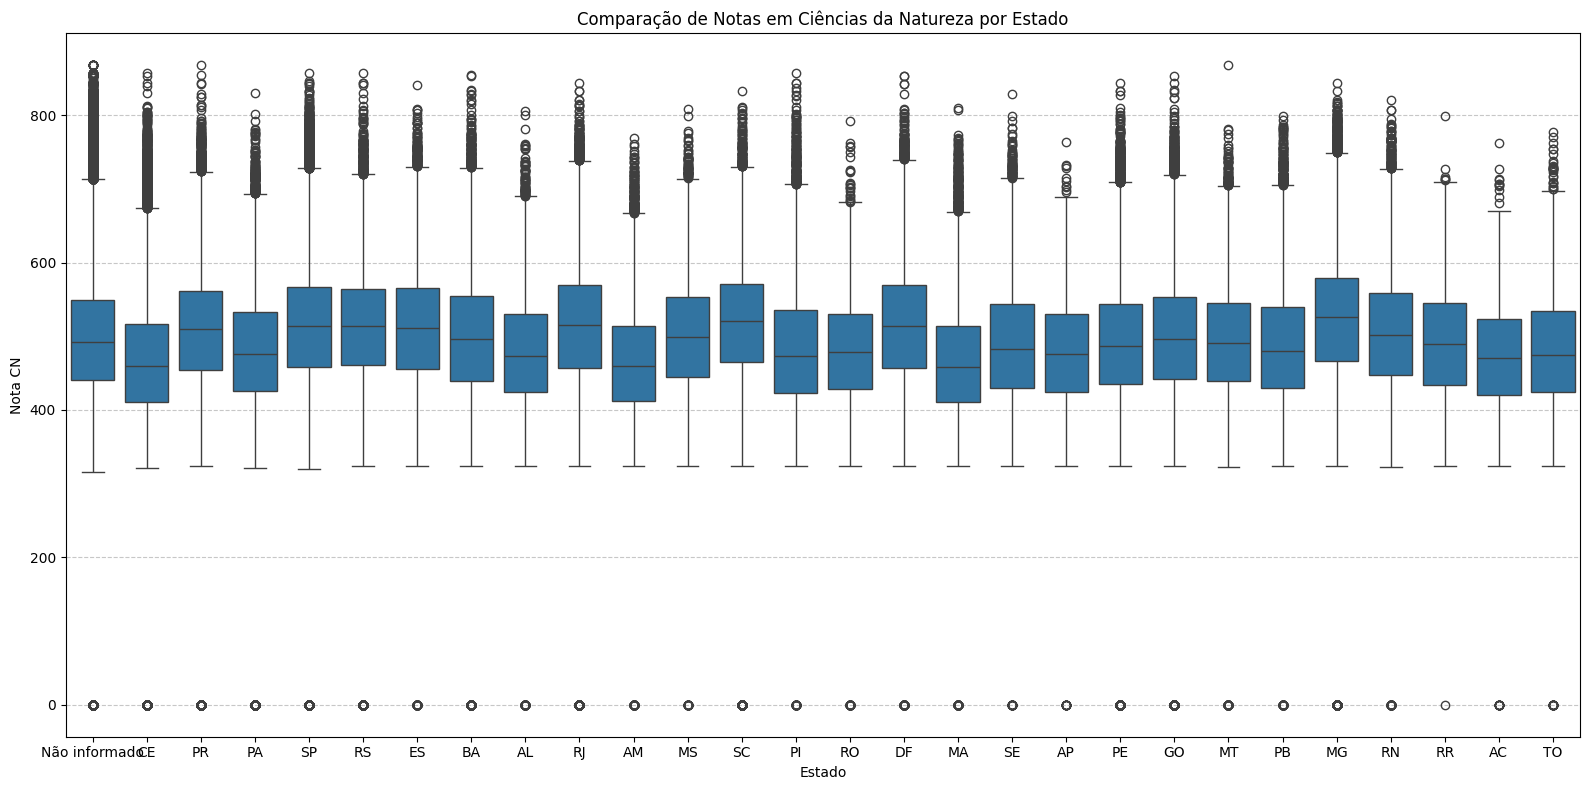


Estatísticas de notas por estado (ordenadas por média):
                     mean  median        std    count
SG_UF_ESC                                            
MG             523.043341  525.80  88.132468    52957
DF             514.286164  514.50  89.977387    16869
SC             514.231095  521.30  94.275882    23724
SP             513.188033  513.70  83.896672   141779
RJ             512.534705  514.85  89.952597    49526
RS             511.759155  514.25  84.055791    32114
ES             510.800533  511.20  86.298736    16127
PR             506.673397  509.40  88.857610    40074
RN             503.522418  502.20  85.695978    14457
MS             499.676277  499.00  83.582060     9282
BA             497.712025  495.80  84.810250    35069
GO             497.612064  496.00  87.656609    28398
Não informado  494.936284  492.80  88.100795  1968042
MT             491.184942  491.40  85.964492    12339
RR             491.009063  489.85  77.518164     1600
PE             489.797318

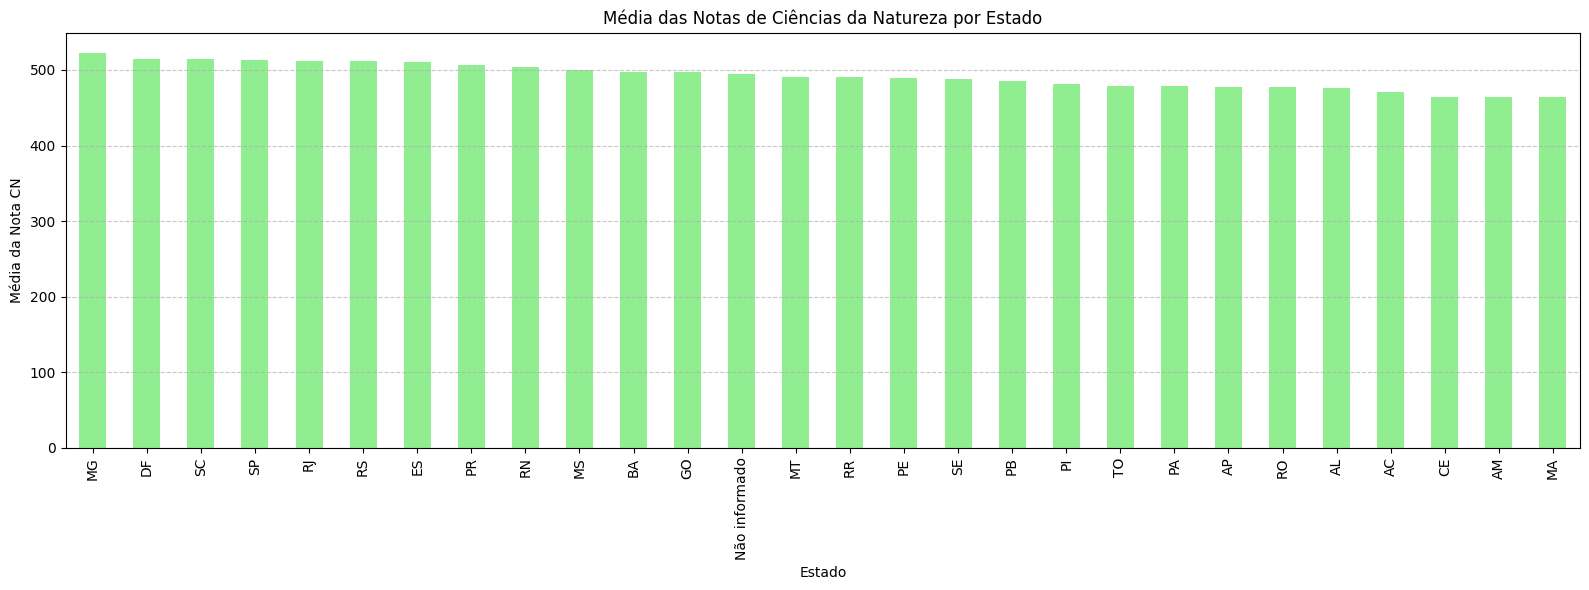

In [10]:
# Análise comparativa entre estados
plt.figure(figsize=(16, 8))
sns.boxplot(x='SG_UF_ESC', y='NU_NOTA_CN', data=df_limpo)
plt.title('Comparação de Notas em Ciências da Natureza por Estado')
plt.ylabel('Nota CN')
plt.xlabel('Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Estatísticas descritivas por estado
estatisticas_por_estado = df_limpo.groupby('SG_UF_ESC')['NU_NOTA_CN'].agg(['mean', 'median', 'std', 'count'])
estatisticas_por_estado = estatisticas_por_estado.sort_values(by='mean', ascending=False)
print("\nEstatísticas de notas por estado (ordenadas por média):")
print(estatisticas_por_estado)

# Visualizando a média das notas por estado em um gráfico de barras
plt.figure(figsize=(16, 6))
estatisticas_por_estado['mean'].plot(kind='bar', color='lightgreen')
plt.title('Média das Notas de Ciências da Natureza por Estado')
plt.ylabel('Média da Nota CN')
plt.xlabel('Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Interpretação dos resultados

Sim, o estado de localização da escola influencia diretamente o desempenho dos alunos na prova de Ciências da Natureza do ENEM. Os gráficos analisados evidenciam diferenças consistentes tanto nas médias quanto nas distribuições de notas entre os diversos estados brasileiros.

Alguns estados se destacam por apresentarem desempenho consistentemente superior. Minas Gerais (MG), Distrito Federal (DF), Santa Catarina (SC), Espírito Santo (ES), Rio Grande do Sul (RS) e Paraná (PR) estão entre os que obtêm os melhores resultados. No primeiro gráfico, observa-se que esses estados registram as maiores médias, frequentemente se aproximando ou até ultrapassando a marca dos 500 pontos. Já no segundo gráfico, nota-se que esses mesmos estados apresentam medianas mais elevadas, indicando que uma parte significativa dos alunos atingiu um bom desempenho.

Por outro lado, há estados com desempenho mais baixo, como Maranhão (MA), Alagoas (AL), Ceará (CE), Acre (AC) e Tocantins (TO). Nestes casos, tanto as médias quanto as medianas das notas são inferiores, refletindo um desempenho geral mais fraco na prova de Ciências da Natureza.

Alguns fatores podem explicar essas diferenças. A desigualdade social e econômica entre as regiões do Brasil tem impacto direto no desempenho escolar. Além disso, estados com maior proporção de escolas privadas tendem a apresentar médias mais altas, dada a diferença de recursos e infraestrutura em relação às escolas públicas. Também é importante considerar as variações nos investimentos estaduais em educação, que influenciam diretamente a qualidade do ensino oferecido e, consequentemente, o desempenho dos estudantes nas avaliações nacionais.

#Localização da Prova

##Média das notas por município de aplicação da prova e possíveis correlações com IDH ou nível educacional da população

###Código

10 municípios com as maiores médias em Ciências da Natureza:
                Município    Média_CN  Contagem  Desvio_Padrão
1658             Valinhos  554.930836      1375      87.829080
1680              Vinhedo  543.561635       795      88.352693
1497  São José dos Campos  539.714145      8441      93.271088
547               Estrela  538.304981       261      78.720644
1457           São Carlos  538.074455      4224      83.491274
1685              Vitória  537.105397      7133      93.831251
1050      Nova Petrópolis  536.873248       314      72.896317
568         Florianópolis  536.452986      7870      98.914973
202        Belo Horizonte  536.221869     40463      95.737748
852               Lajeado  535.472475       901      81.725355

10 municípios com as menores médias em Ciências da Natureza:
                 Município    Média_CN  Contagem  Desvio_Padrão
269             Caapiranga  399.395146       103     121.580284
43                Alvarães  401.195714        70     136

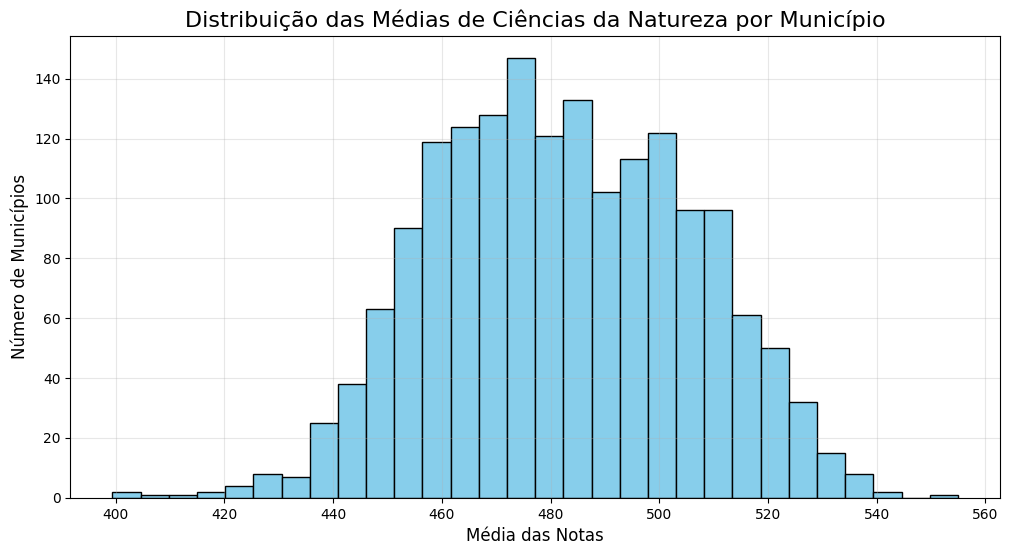


Médias por estado (UF):
    UF    Média_CN  Contagem  Desvio_Padrão
25  SP  515.487939    411865      86.464525
10  MG  514.470680    251247      87.888997
6   DF  513.710532     50533      95.737712
23  SC  510.542638     63005      96.162398
7   ES  508.959989     49479      86.847574
22  RS  508.822387    111095      85.472273
17  PR  507.271799    115251      91.644420
18  RJ  506.342465    185323      91.246392
8   GO  496.729828     96797      88.034859
11  MS  495.507070     31458      85.257286
21  RR  493.549413      6138      83.576930
19  RN  493.313026     73062      86.332539
12  MT  488.045705     41858      89.428028
15  PE  487.627016    153312      83.339449
24  SE  485.142523     47417      85.841806
14  PB  485.116746     87989      85.268580
4   BA  483.373846    221345      82.620267
5   CE  482.499649    174884      88.499754
1   AL  480.316601     55201      82.156017
20  RO  480.188724     23137      83.728977
26  TO  479.857223     21696      83.576096
16  PI 

<ipython-input-13-17e71614e490>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UF', y='Média_CN', data=medias_por_estado, palette='viridis')


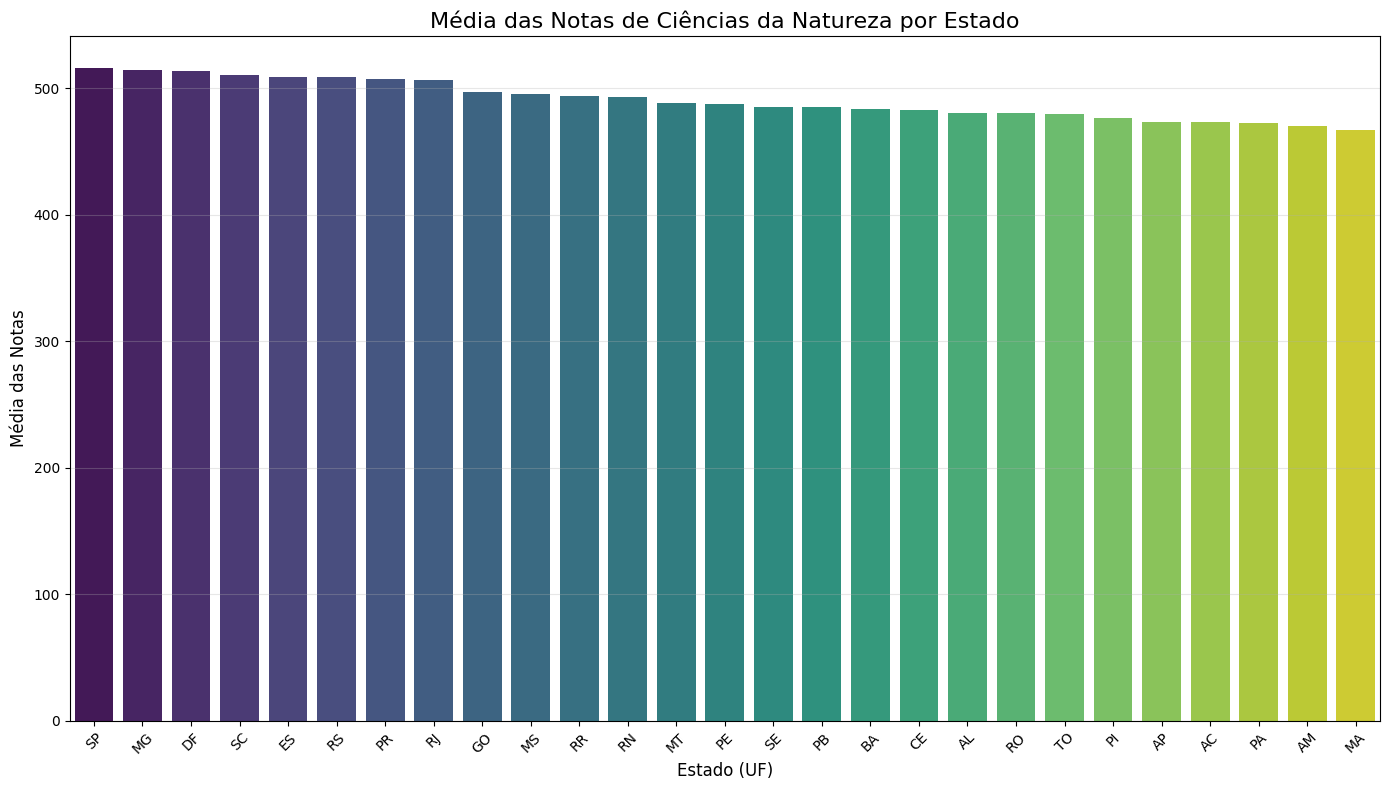


Municípios com maior diferença entre escolas privadas e públicas:
     NO_MUNICIPIO_PROVA  Média_Não_Respondeu  Média_Pública  Média_Privada  \
1202           Piratini           494.022680     329.900000     484.593443   
746           Itaquiraí           480.061818     324.800000     464.238462   
371           Caririaçu           485.713712     337.700000     462.568231   
654               Icatu           445.963699     305.166667     426.349030   
143      Aurora do Pará           462.710526     327.100000     446.586905   
29              Aliança           471.314198     340.800000     451.629412   
1326       Rorainópolis           468.442553     375.300000     476.348193   
92           Araguatins           459.798235     355.600000     456.362466   
1427             Silves           459.048649     332.800000     431.537719   
1007            Mucajaí           464.649254     383.500000     481.617391   

      Diferença_Privada_Publica  
1202                 154.693443  
746   

In [13]:
# Agrupando os dados por município de aplicação e calculando a média das notas de Ciências da Natureza
medias_por_municipio = df_limpo.groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_CN'].agg(['mean', 'count', 'std']).reset_index()
medias_por_municipio.columns = ['Município', 'Média_CN', 'Contagem', 'Desvio_Padrão']

# Ordenando os municípios pela média das notas (em ordem decrescente)
medias_por_municipio_ordenado = medias_por_municipio.sort_values(by='Média_CN', ascending=False)

# Filtrando apenas municípios com pelo menos 30 participantes para análise mais confiável
municipios_relevantes = medias_por_municipio[medias_por_municipio['Contagem'] >= 30]
municipios_relevantes = municipios_relevantes.sort_values(by='Média_CN', ascending=False)

# Exibindo os 10 municípios com as maiores médias
print("10 municípios com as maiores médias em Ciências da Natureza:")
print(municipios_relevantes.head(10))

# Exibindo os 10 municípios com as menores médias
print("\n10 municípios com as menores médias em Ciências da Natureza:")
print(municipios_relevantes.sort_values(by='Média_CN').head(10))

# Visualizando a distribuição das médias por município em um histograma
plt.figure(figsize=(12, 6))
plt.hist(municipios_relevantes['Média_CN'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição das Médias de Ciências da Natureza por Município', fontsize=16)
plt.xlabel('Média das Notas', fontsize=12)
plt.ylabel('Número de Municípios', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('distribuicao_medias_municipios.png', bbox_inches='tight')
plt.show()

# Análise por estado para entender a distribuição geográfica
medias_por_estado = df_limpo.groupby('SG_UF_PROVA')['NU_NOTA_CN'].agg(['mean', 'count', 'std']).reset_index()
medias_por_estado.columns = ['UF', 'Média_CN', 'Contagem', 'Desvio_Padrão']
medias_por_estado = medias_por_estado.sort_values(by='Média_CN', ascending=False)

print("\nMédias por estado (UF):")
print(medias_por_estado)

# Visualizando as médias por estado em um gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='UF', y='Média_CN', data=medias_por_estado, palette='viridis')
plt.title('Média das Notas de Ciências da Natureza por Estado', fontsize=16)
plt.xlabel('Estado (UF)', fontsize=12)
plt.ylabel('Média das Notas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('medias_por_estado.png', bbox_inches='tight')
plt.show()

# Analisando a relação entre tipo de escola e média das notas por município
# Agrupando os dados por tipo de escola e município
media_por_tipo_escola_municipio = df_limpo.groupby(['NO_MUNICIPIO_PROVA', 'TP_ESCOLA'])['NU_NOTA_CN'].mean().reset_index()

# Pivotando para ter as médias por tipo de escola em colunas separadas
media_pivot = media_por_tipo_escola_municipio.pivot(index='NO_MUNICIPIO_PROVA', columns='TP_ESCOLA', values='NU_NOTA_CN')
media_pivot.columns = ['Média_Não_Respondeu', 'Média_Pública', 'Média_Privada']
media_pivot = media_pivot.reset_index()

# Preenchendo valores NaN com 0
media_pivot = media_pivot.fillna(0)

# Calculando a diferença entre escolas públicas e privadas
media_pivot['Diferença_Privada_Publica'] = media_pivot['Média_Privada'] - media_pivot['Média_Pública']

# Filtrando apenas municípios onde existem ambos os tipos de escolas
media_pivot_filtrada = media_pivot[(media_pivot['Média_Pública'] > 0) & (media_pivot['Média_Privada'] > 0)]

# Ordenando pela diferença
media_pivot_ordenada = media_pivot_filtrada.sort_values(by='Diferença_Privada_Publica', ascending=False)

print("\nMunicípios com maior diferença entre escolas privadas e públicas:")
print(media_pivot_ordenada.head(10))

###Interpretação dos resultados

Sim, a média das notas de Ciências da Natureza apresenta uma variação significativa entre os municípios, o que pode estar relacionado a fatores como o Índice de Desenvolvimento Humano (IDH) e o nível educacional da população local. Observando a distribuição das médias por município, nota-se que a maior concentração está entre 460 e 500 pontos, indicando uma forte tendência central em torno dessa faixa. A distribuição é aproximadamente simétrica, com um leve viés à direita, sugerindo que poucos municípios alcançam médias mais altas, acima de 520 pontos. Já os municípios com médias abaixo de 440 pontos são minoria, o que pode indicar realidades locais com baixo desempenho educacional, possivelmente atreladas a dificuldades socioeconômicas ou à baixa oferta de recursos educacionais.

Ao analisar as médias por estado, percebe-se que os melhores desempenhos estão concentrados em unidades federativas como São Paulo, Minas Gerais, Distrito Federal, Santa Catarina, Espírito Santo, Rio Grande do Sul e Paraná, todos com médias acima de 500 pontos. Por outro lado, estados como Maranhão, Amazonas, Pará, Acre e Amapá apresentam as menores médias, situadas abaixo dos 480 pontos. Essa distribuição acompanha dados históricos do IDH no Brasil, nos quais os estados das regiões Sul e Sudeste geralmente apresentam melhores indicadores sociais e educacionais em comparação aos estados do Norte e Nordeste.

As possíveis explicações para essas variações incluem a correlação com o IDH municipal, uma vez que municípios com maior IDH tendem a oferecer melhores condições educacionais, como infraestrutura adequada, professores qualificados e acesso à tecnologia, refletindo-se nas notas médias dos estudantes. Além disso, o nível de escolaridade da população também exerce influência: locais com maior percentual de pessoas com ensino médio ou superior completo criam um ambiente mais favorável ao desenvolvimento educacional. Por fim, a distribuição desigual dos investimentos públicos em educação básica e média entre as regiões do país também é um fator determinante na qualidade do ensino e, consequentemente, no desempenho dos estudantes.

##Municípios com maior e menor variação de notas e os fatores associados a essas diferenças


###Código


Municípios com MAIOR variação de notas (maior heterogeneidade):
                Município    Média_CN  Contagem  Desvio_Padrão  Coef_Variação
43               Alvarães  401.195714        70     136.768756      34.090283
30               Almeirim  426.668156       179     136.318269      31.949483
269            Caapiranga  399.395146       103     121.580284      30.441102
527   Encruzilhada do Sul  459.490094       212     138.015543      30.036674
1158         Pedro Afonso  432.716832       303     129.035977      29.819958
315             Campo Bom  483.112720       511     141.530826      29.295612
1650          Urucurituba  406.495588       136     114.881611      28.261466
429               Codajás  428.330500       200     116.158107      27.118804
805                 Jaíba  465.178302       318     122.665281      26.369519
1058           Novo Airão  423.679130       115     111.614973      26.344223

Municípios com MENOR variação de notas (maior homogeneidade):
              

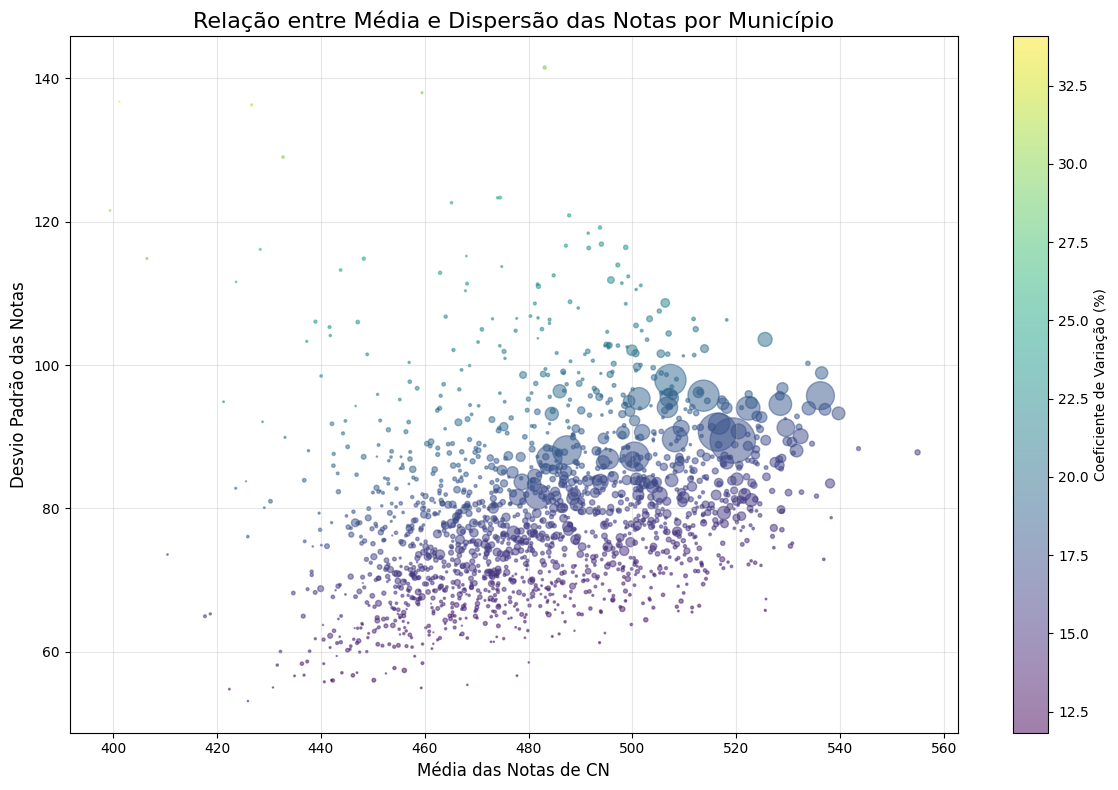

<ipython-input-14-9e460485b685>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variacao_por_renda = df_limpo.groupby(['NO_MUNICIPIO_PROVA', 'Q006'])['NU_NOTA_CN'].agg(['mean', 'std']).reset_index()
<ipython-input-14-9e460485b685>:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  variacao_pivot = variacao_por_renda.pivot_table(index='Município', columns='Renda_Familiar',



Distribuição dos municípios por faixa de coeficiente de variação:
Coef_Variação
(11.806, 16.281]    945
(16.281, 20.733]    677
(20.733, 25.186]     75
(25.186, 29.638]      9
(29.638, 34.09]       5
Name: count, dtype: int64

Média do coeficiente de variação por tipo de escola:
     Tipo_Escola  Coef_Variação
0  Não Respondeu      16.492281
1        Privada      14.224224
2        Pública      15.788718


In [14]:
# Calculando o coeficiente de variação (desvio padrão / média)
municipios_relevantes['Coef_Variação'] = (municipios_relevantes['Desvio_Padrão'] / municipios_relevantes['Média_CN']) * 100

# Ordenando por maior variação
maior_variacao = municipios_relevantes.sort_values(by='Coef_Variação', ascending=False)
menor_variacao = municipios_relevantes.sort_values(by='Coef_Variação')

print("\nMunicípios com MAIOR variação de notas (maior heterogeneidade):")
print(maior_variacao.head(10))

print("\nMunicípios com MENOR variação de notas (maior homogeneidade):")
print(menor_variacao.head(10))

# Visualizando a relação entre média e desvio padrão
plt.figure(figsize=(12, 8))
plt.scatter(municipios_relevantes['Média_CN'], municipios_relevantes['Desvio_Padrão'],
            alpha=0.5, s=municipios_relevantes['Contagem']/100, c=municipios_relevantes['Coef_Variação'], cmap='viridis')
plt.colorbar(label='Coeficiente de Variação (%)')
plt.xlabel('Média das Notas de CN', fontsize=12)
plt.ylabel('Desvio Padrão das Notas', fontsize=12)
plt.title('Relação entre Média e Dispersão das Notas por Município', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('relacao_media_dispersao.png', bbox_inches='tight')
plt.show()

# Análise dos fatores socioeconômicos vs estrutura escolar na variação das notas

# Agrupando por município e renda familiar
variacao_por_renda = df_limpo.groupby(['NO_MUNICIPIO_PROVA', 'Q006'])['NU_NOTA_CN'].agg(['mean', 'std']).reset_index()
variacao_por_renda.columns = ['Município', 'Renda_Familiar', 'Média_CN', 'Desvio_Padrão']

# Calculando o coeficiente de variação
variacao_por_renda['Coef_Variação'] = (variacao_por_renda['Desvio_Padrão'] / variacao_por_renda['Média_CN']) * 100

# Pivotando para ter as rendas como colunas
variacao_pivot = variacao_por_renda.pivot_table(index='Município', columns='Renda_Familiar',
                                               values='Média_CN').reset_index()

# Contador de municípios por faixa de variação
contagem_variacao = pd.cut(municipios_relevantes['Coef_Variação'], bins=5).value_counts().sort_index()

print("\nDistribuição dos municípios por faixa de coeficiente de variação:")
print(contagem_variacao)

# Análise da relação entre variação e tipo de escola
variacao_por_tipo_escola = df_limpo.groupby(['NO_MUNICIPIO_PROVA', 'TP_ESCOLA'])['NU_NOTA_CN'].agg(['mean', 'std', 'count']).reset_index()
variacao_por_tipo_escola.columns = ['Município', 'Tipo_Escola', 'Média_CN', 'Desvio_Padrão', 'Contagem']
variacao_por_tipo_escola['Coef_Variação'] = (variacao_por_tipo_escola['Desvio_Padrão'] / variacao_por_tipo_escola['Média_CN']) * 100

# Filtrando apenas registros com pelo menos 30 estudantes
variacao_por_tipo_escola_filtrada = variacao_por_tipo_escola[variacao_por_tipo_escola['Contagem'] >= 30]

# Calculando a média do coeficiente de variação por tipo de escola
media_variacao_por_tipo = variacao_por_tipo_escola_filtrada.groupby('Tipo_Escola')['Coef_Variação'].mean().reset_index()

print("\nMédia do coeficiente de variação por tipo de escola:")
print(media_variacao_por_tipo)

###Interpretação dos resultados

A análise da relação entre média e dispersão das notas por município revela que, além da variação nas médias, há também diferenças significativas no grau de homogeneidade do desempenho dos estudantes. O gráfico mostra que municípios com médias mais altas tendem a apresentar também maior dispersão das notas, representada pelo desvio padrão. Esse comportamento pode estar ligado à maior diversidade de perfis entre os participantes, o que é comum em cidades maiores ou com maior acesso a diferentes tipos de escolas, tanto públicas quanto privadas. Por outro lado, municípios com médias mais baixas geralmente apresentam menor dispersão, o que sugere um desempenho mais uniforme entre os alunos, embora em um patamar inferior.

O coeficiente de variação, indicado pela cor dos pontos, fornece uma medida relativa da variação das notas. Nota-se que municípios com maiores coeficientes de variação (aqueles mais destacados em tons claros) apresentam grande desigualdade no desempenho dos estudantes em relação à própria média local. Essa alta variação pode refletir desigualdades internas, como diferenças marcantes entre escolas da rede pública e particular, ou ainda o impacto de políticas educacionais inconsistentes. Em contrapartida, municípios com menor coeficiente de variação (destacados em tons mais escuros) indicam maior homogeneidade no desempenho, o que pode ser consequência de uma rede educacional mais equilibrada ou de um contexto socioeconômico menos desigual.

Essas variações nos níveis de dispersão e média estão associadas a fatores estruturais dos municípios, como o tamanho da população estudantil, a diversidade de redes de ensino, os investimentos públicos em educação e o perfil socioeconômico dos estudantes. Cidades com melhor infraestrutura educacional e maior heterogeneidade social tendem a apresentar tanto médias mais elevadas quanto maior variação nas notas. Já em contextos mais homogêneos, geralmente com limitações de acesso e recursos, observa-se tanto média quanto dispersão mais baixas.